* 521H0220 - Bui Hai Duong
* 521H0508 - Bui Anh Phu
* 521H0506 - Vo Kien Nam

# The Data: Diabetes 130-US hospitals for years 1999-2008

The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge. The problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide proper diabetes care not only increases the managing costs for the hospitals (as the patients are readmitted) but also impacts the morbidity and mortality of the patients, who may face complications associated with diabetes.

source: https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

## Loading Data

Set pandas options:
+ Display max columns: 500
+ inf values are considered na

In [1]:
import pandas as pd
import numpy as np

In [2]:
# display options
pd.set_option('display.max_columns', 100)
pd.options.mode.use_inf_as_na = True
df = pd.read_csv('E:\Learning\Machine learning\Finalterm\data\diabetes+130-us+hospitals+for+years+1999-2008\diabetic_data.csv')
df.head()

C:\Users\buiha\AppData\Local\Temp\ipykernel_21740\175623663.py:3: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Data investigation

### metformin

Text(0.5, 1.0, 'Readmission by metformin')

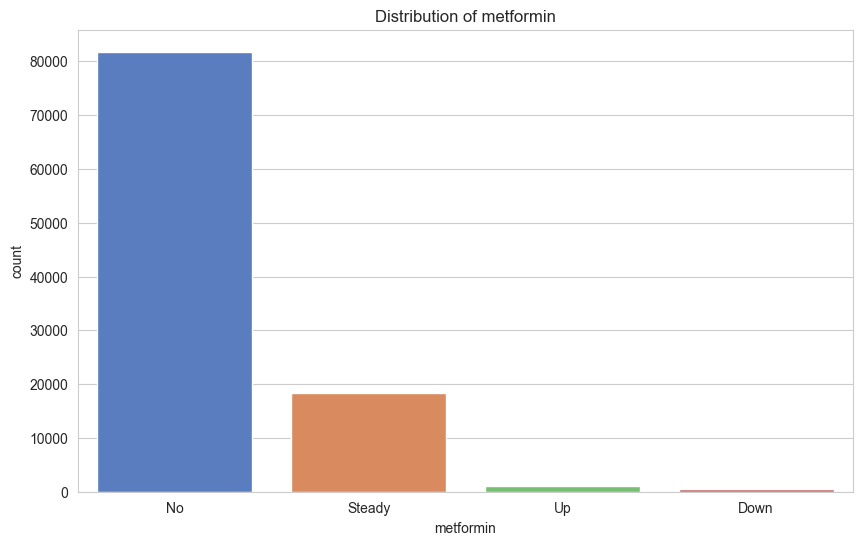

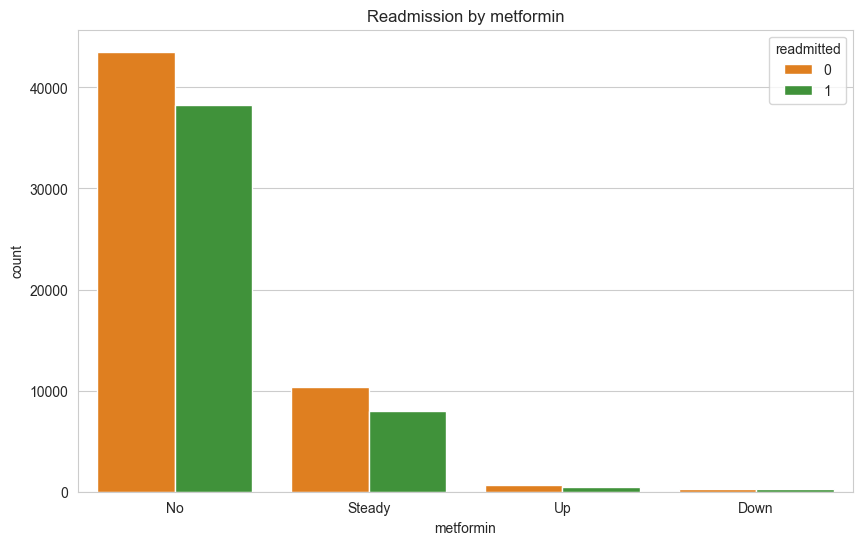

In [55]:
#plot the distribution of metformin
plt.figure(figsize=(10, 6))
sns.countplot(x='metformin', hue='metformin', data=df, palette='muted',legend=False)
plt.title('Distribution of metformin')

# plot to see the relation between metformin and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='metformin', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by metformin')

[0.46781530484971506, 0.4333914749809223, 0.4076850984067479, 0.4504347826086956]


Text(0.5, 1.0, 'Readmission percentage by metformin')

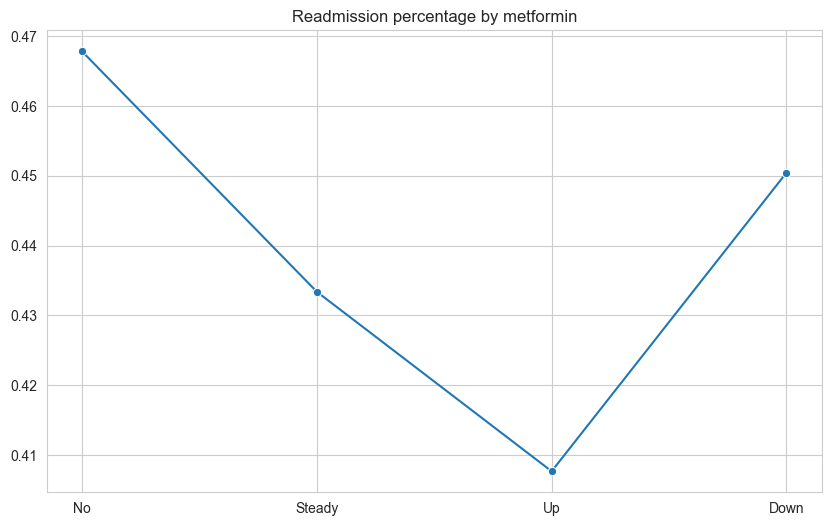

In [56]:
# readmission percentage by metformin
print(readmission_percentage('metformin'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['metformin'].unique(),y=readmission_percentage('metformin'),marker='o')
plt.title('Readmission percentage by metformin')

In [57]:
df.columns

Index(['encounter_id', 'patient_nbr', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_procedures', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

The prescription for metformin goes down or not prescripted usually results in higher readmission rate while keeping it steady or increase dosage would make the rate go down.

## repaglinide

Text(0.5, 1.0, 'Readmission by repaglinide')

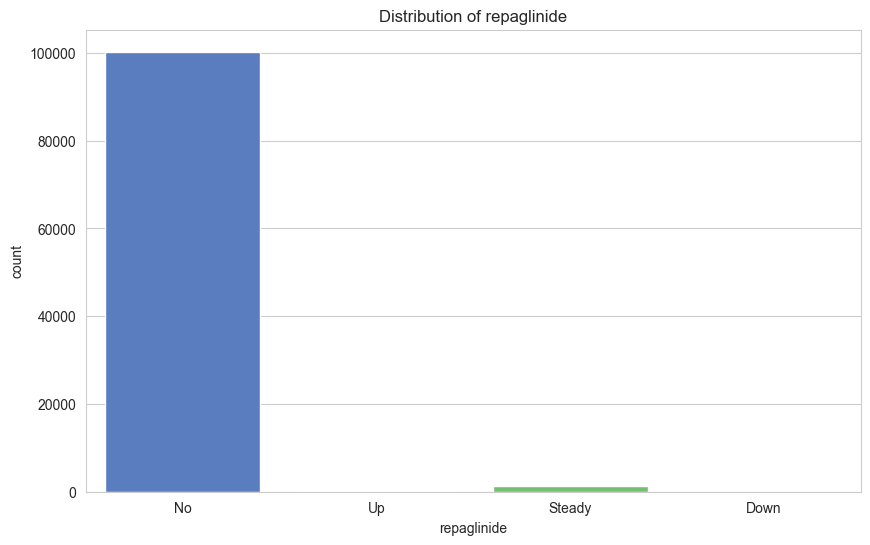

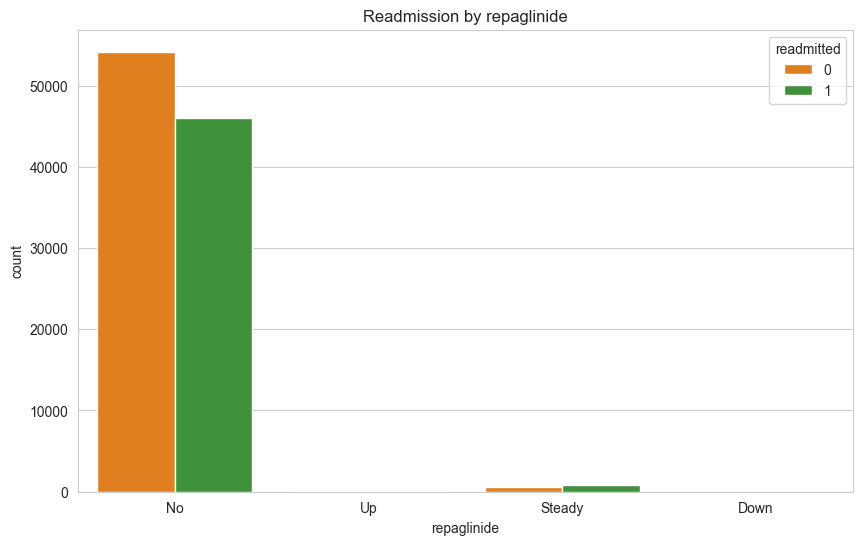

In [58]:
#plot the distribution of repaglinide
plt.figure(figsize=(10, 6))
sns.countplot(x='repaglinide', hue='repaglinide', data=df, palette='muted',legend=False)
plt.title('Distribution of repaglinide')

# plot to see the relation between repaglinide and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='repaglinide', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by repaglinide')

[0.45952687399602904, 0.4818181818181818, 0.5563583815028902, 0.4888888888888889]


Text(0.5, 1.0, 'Readmission percentage by repaglinide')

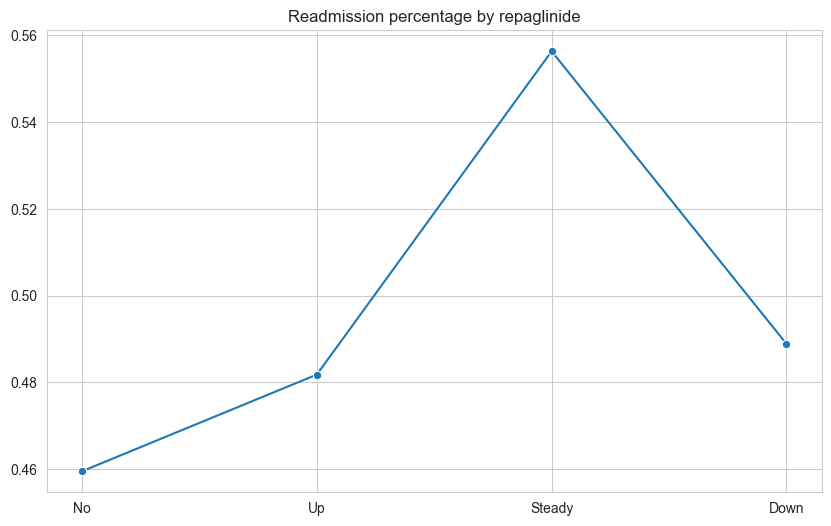

In [59]:
# readmission percentage by repaglinide
print(readmission_percentage('repaglinide'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['repaglinide'].unique(),y=readmission_percentage('repaglinide'),marker='o')
plt.title('Readmission percentage by repaglinide')

The prescription for repqglinide goes up, usually results in higher readmission rate while keeping it steady or decrease dosage would make the rate go down.

As we see here the percentages of the patient use this kind of medicine seem to increase and a go down a little to the 'down' status. Althought the data of the patient use this medicine is too small but based on the lineplot percentages we will try to keep it.

## nateglinide

Text(0.5, 1.0, 'Readmission by nateglinide')

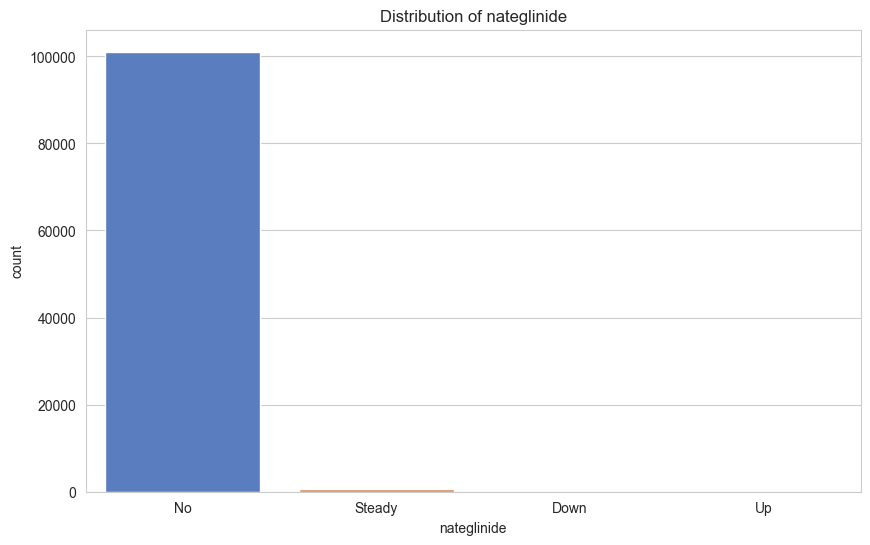

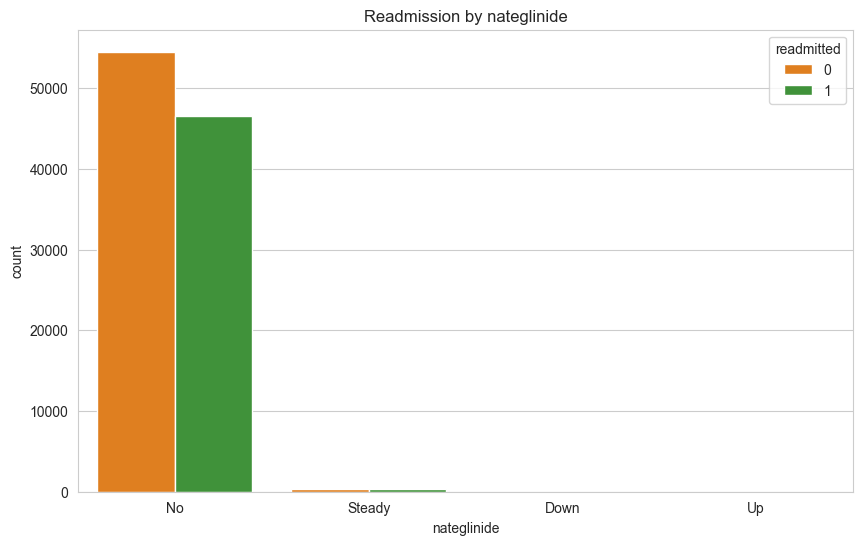

In [60]:
#plot the distribution of nateglinide
plt.figure(figsize=(10, 6))
sns.countplot(x='nateglinide', hue='nateglinide', data=df, palette='muted',legend=False)
plt.title('Distribution of nateglinide')

# plot to see the relation between nateglinide and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='nateglinide', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by nateglinide')

[0.4607027299803093, 0.4880239520958084, 0.45454545454545453, 0.4583333333333333]


Text(0.5, 1.0, 'Readmission percentage by nateglinide')

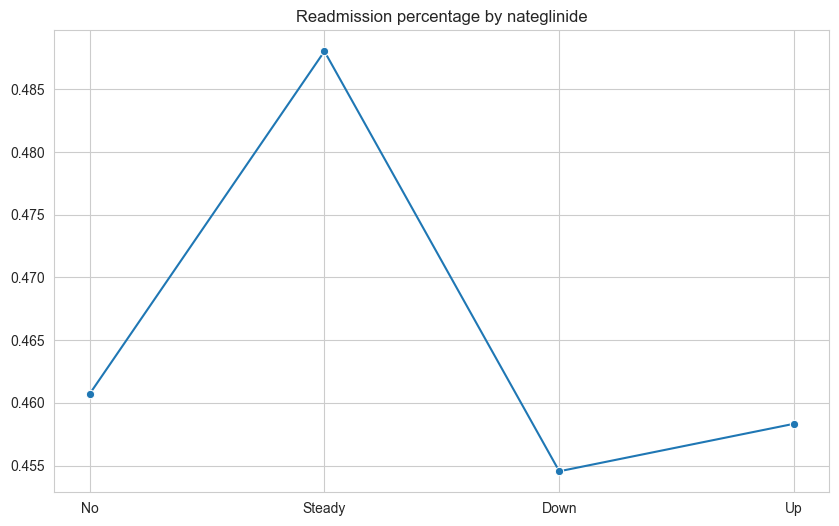

In [61]:
# readmission percentage by nateglinide
print(readmission_percentage('nateglinide'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['nateglinide'].unique(),y=readmission_percentage('nateglinide'),marker='o')
plt.title('Readmission percentage by nateglinide')

The prescription for repqglinide results in higher readmission rate while keeping it steady and decrease dosage would make the rate go down significantly and increase dosage would make the rate go up slightly.

## chlorpropamide

Text(0.5, 1.0, 'Readmission by chlorpropamide')

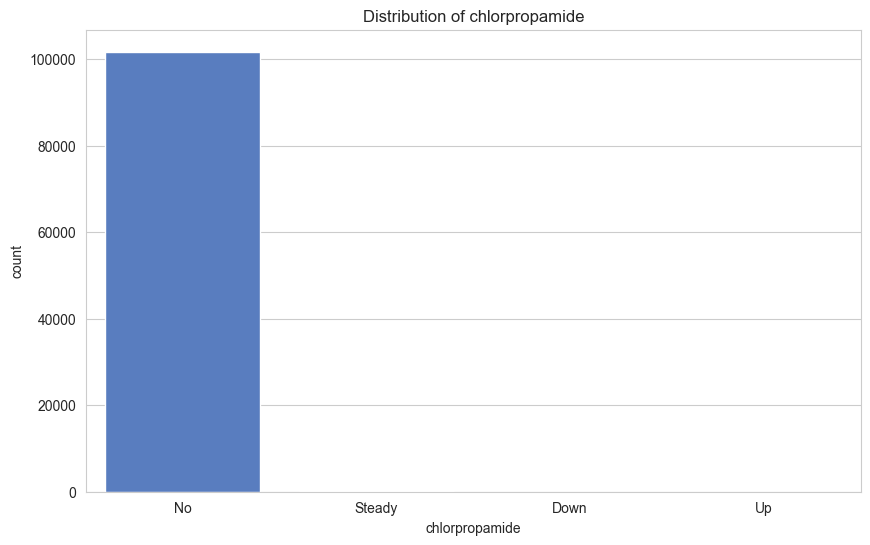

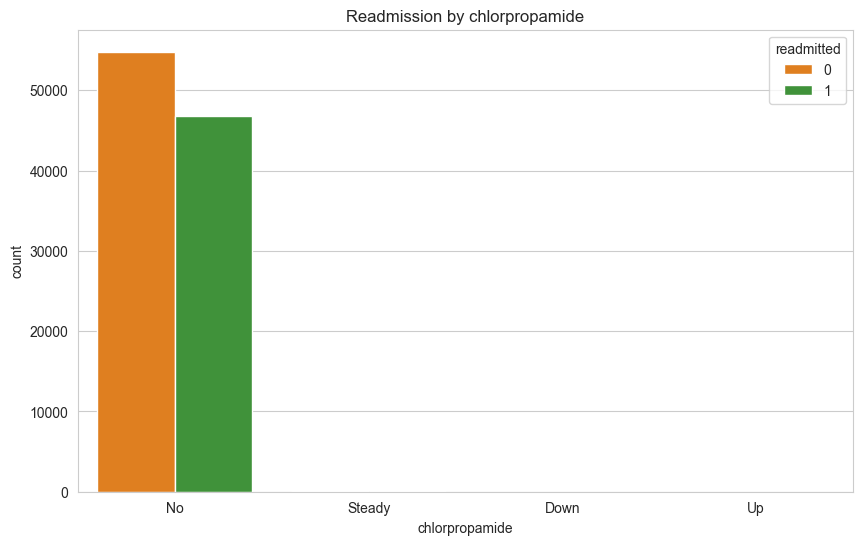

In [62]:
#plot the distribution of chlorpropamide
plt.figure(figsize=(10, 6))
sns.countplot(x='chlorpropamide', hue='chlorpropamide', data=df, palette='muted',legend=False)
plt.title('Distribution of chlorpropamide')

# plot to see the relation between chlorpropamide and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='chlorpropamide', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by chlorpropamide')

[0.46088709677419354, 0.43037974683544306, 0.0, 0.8333333333333334]


Text(0.5, 1.0, 'Readmission percentage by chlorpropamide')

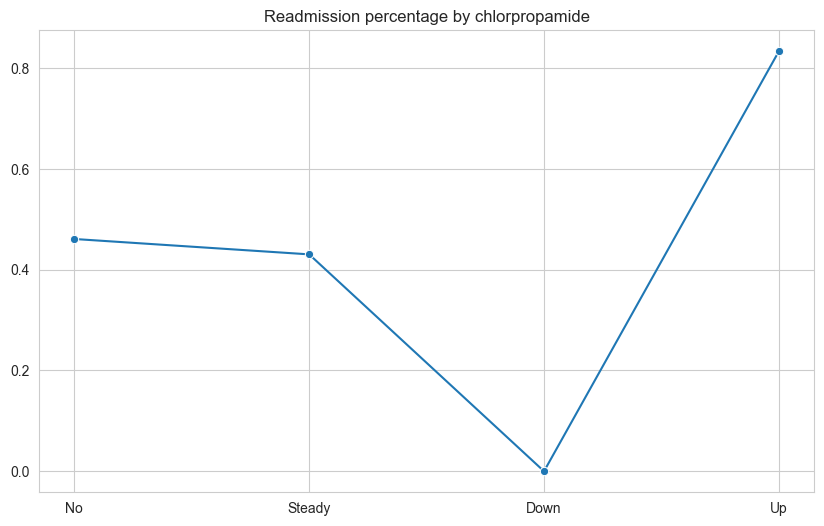

In [63]:
# readmission percentage by chlorpropamide
print(readmission_percentage('chlorpropamide'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['chlorpropamide'].unique(),y=readmission_percentage('chlorpropamide'),marker='o')
plt.title('Readmission percentage by chlorpropamide')

The prescription for chlorpropamide results readmission rate go down slightly while keeping it steady. Decrease dosage would make the rate go down significantly then reach the bottom. Increase dosage would make it reach the highest percentages of the readmission rate.

## glimepiride

Text(0.5, 1.0, 'Readmission by glimepiride')

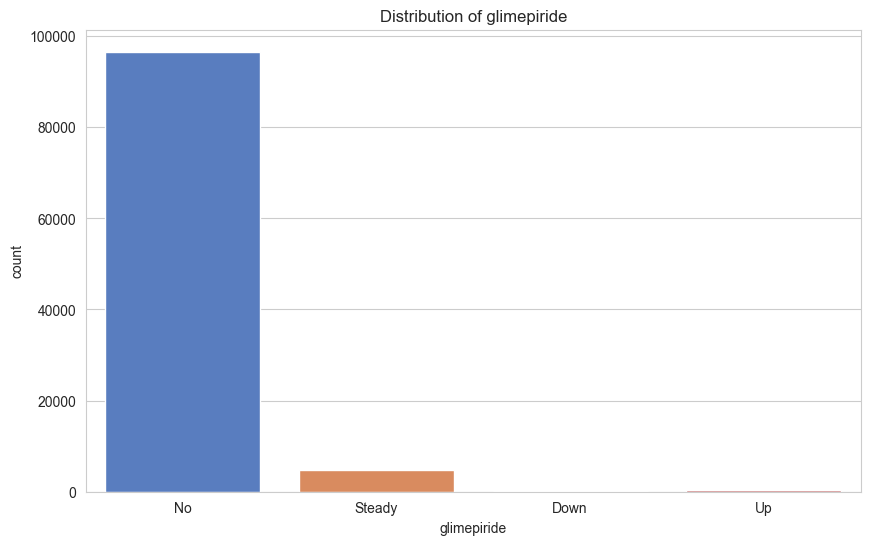

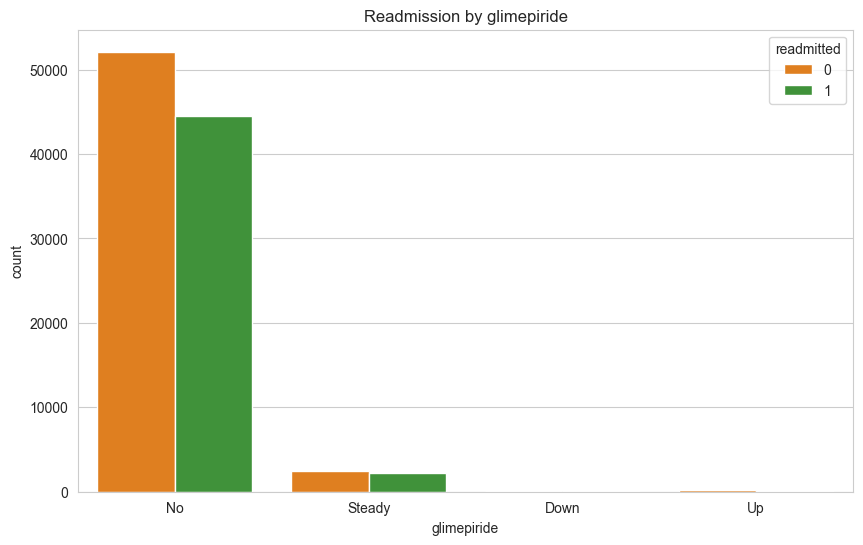

In [64]:
#plot the distribution of glimepiride
plt.figure(figsize=(10, 6))
sns.countplot(x='glimepiride', hue='glimepiride', data=df, palette='muted',legend=False)
plt.title('Distribution of glimepiride')

# plot to see the relation between glimepiride and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='glimepiride', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by glimepiride')

[0.46041936318923116, 0.4721627408993576, 0.4793814432989691, 0.42507645259938837]


Text(0.5, 1.0, 'Readmission percentage by glimepiride')

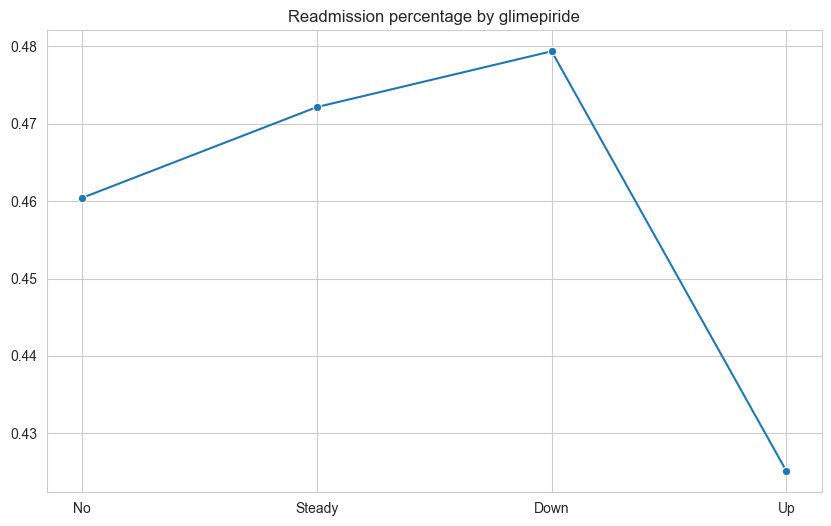

In [65]:
# readmission percentage by glimepiride
print(readmission_percentage('glimepiride'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['glimepiride'].unique(),y=readmission_percentage('glimepiride'),marker='o')
plt.title('Readmission percentage by glimepiride')

The prescription for glimepiride results readmission rate go up slightly while keeping it steady and reach the top when decrease the dosage. Increase dosage would make the rate go down significantly then reach the bottom.

## acetohexamide

Text(0.5, 1.0, 'Readmission by acetohexamide')

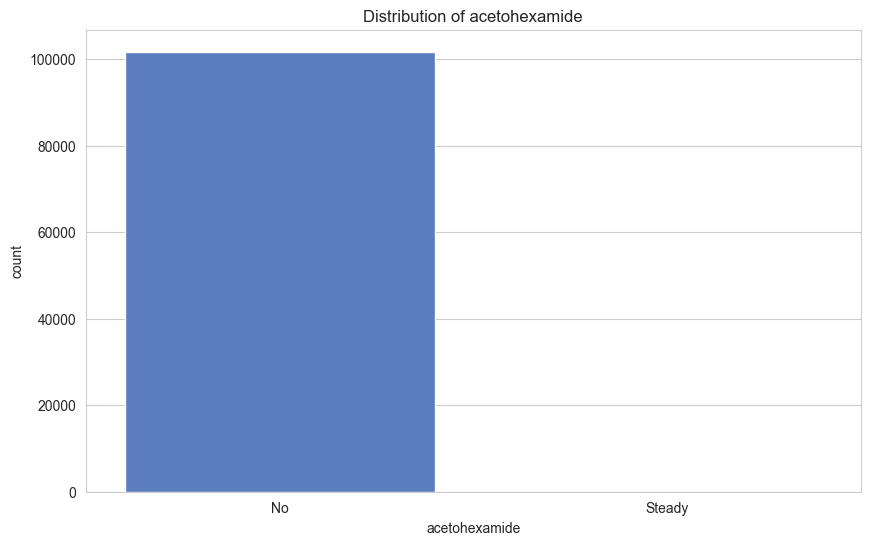

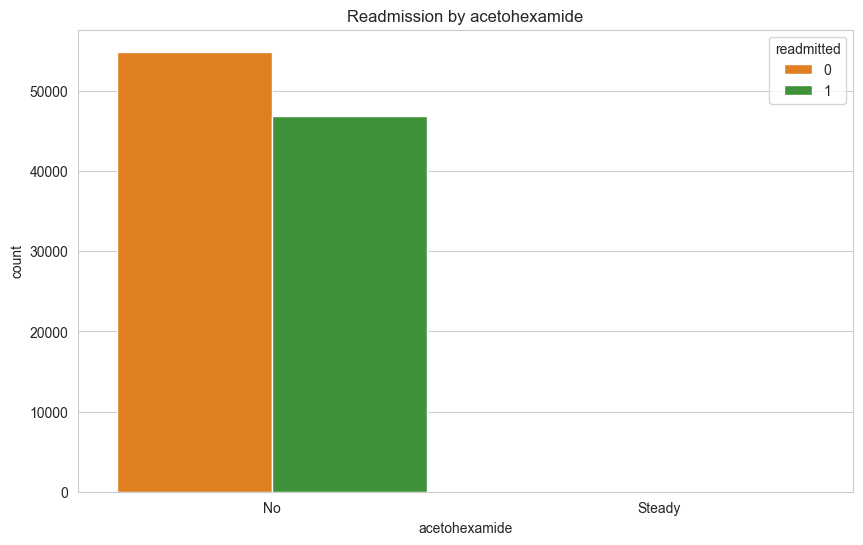

In [66]:
#plot the distribution of acetohexamide
plt.figure(figsize=(10, 6))
sns.countplot(x='acetohexamide', hue='acetohexamide', data=df, palette='muted',legend=False)
plt.title('Distribution of acetohexamide')

# plot to see the relation between acetohexamide and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='acetohexamide', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by acetohexamide')

[0.4608755466024665, 1.0]


Text(0.5, 1.0, 'Readmission percentage by acetohexamide')

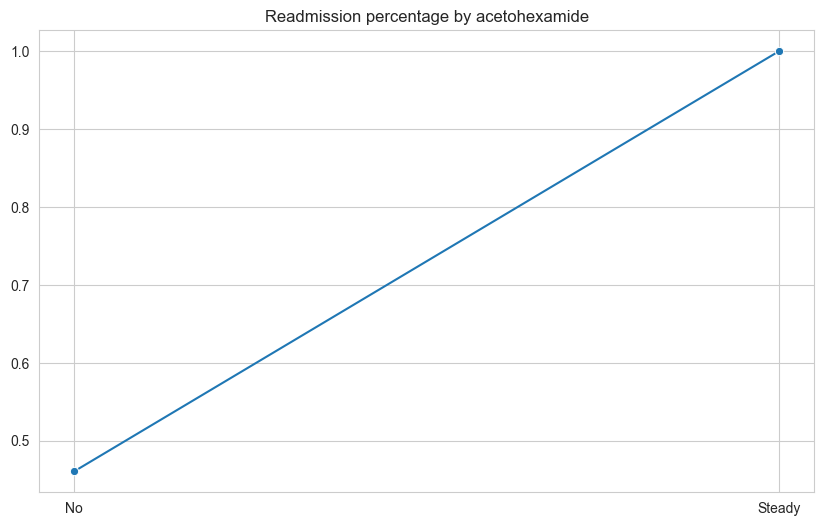

In [67]:
# readmission percentage by acetohexamide
print(readmission_percentage('acetohexamide'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['acetohexamide'].unique(),y=readmission_percentage('acetohexamide'),marker='o')
plt.title('Readmission percentage by acetohexamide')

The prescription for acetohexamide results readmission rate go up from non prescription to steady and reach the top at 100%

## glipizide

Text(0.5, 1.0, 'Readmission by glipizide')

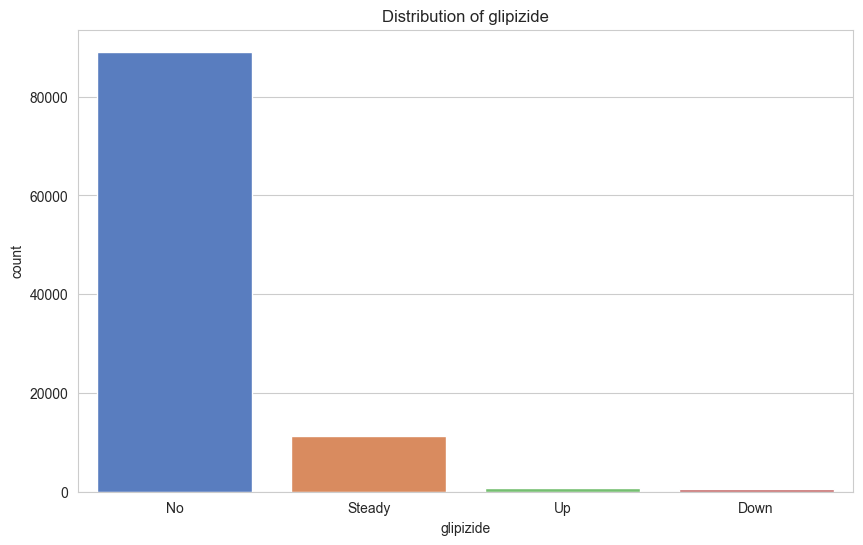

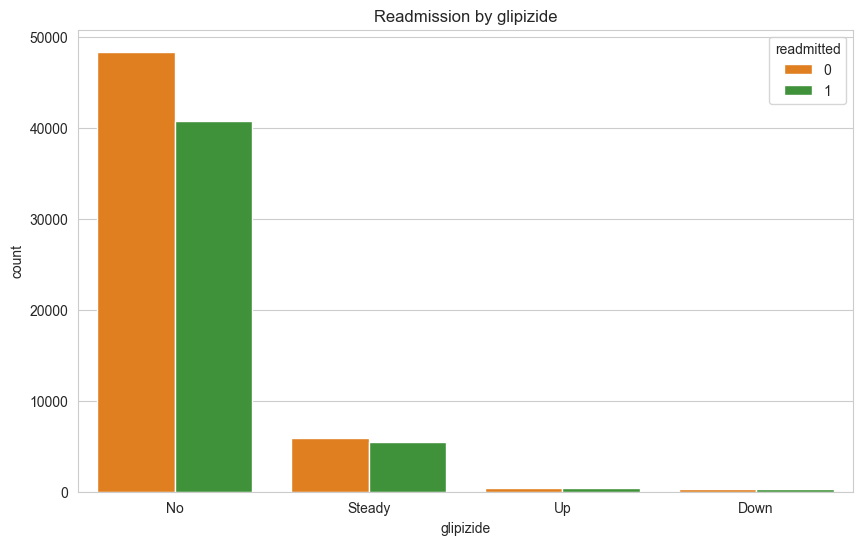

In [68]:
#plot the distribution of glipizide
plt.figure(figsize=(10, 6))
sns.countplot(x='glipizide', hue='glipizide', data=df, palette='muted',legend=False)
plt.title('Distribution of glipizide')

# plot to see the relation between glipizide and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='glipizide', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by glipizide')

[0.4571171980242479, 0.4844135258893977, 0.5, 0.5285714285714286]


Text(0.5, 1.0, 'Readmission percentage by glipizide')

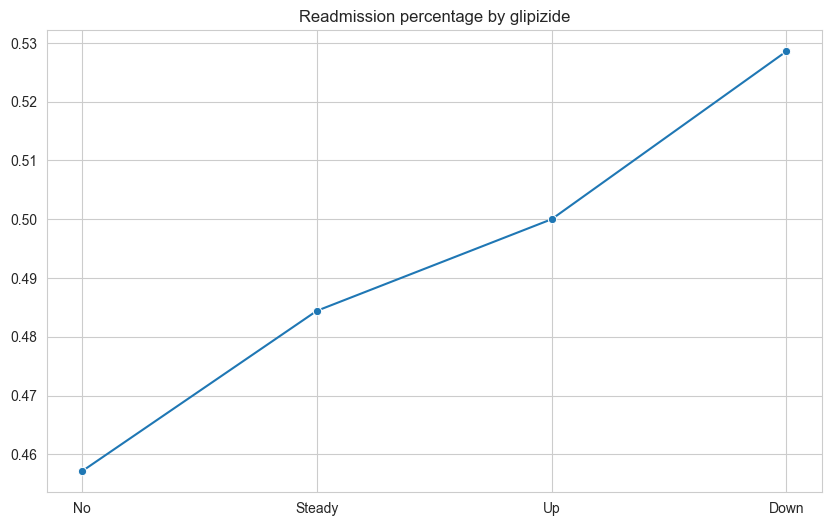

In [69]:
# readmission percentage by glipizide
print(readmission_percentage('glipizide'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['glipizide'].unique(),y=readmission_percentage('glipizide'),marker='o')
plt.title('Readmission percentage by glipizide')

The prescription for glipizide results readmission rate go up when keeping the dosage steady and slightly increase when increase the dosage then reach the top when decrease the dosage. 

## glyburide

Text(0.5, 1.0, 'Readmission by glyburide')

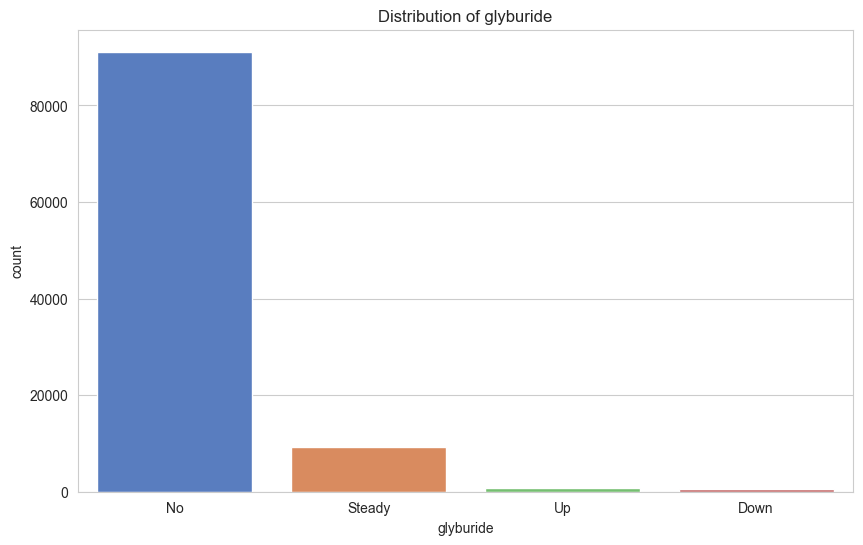

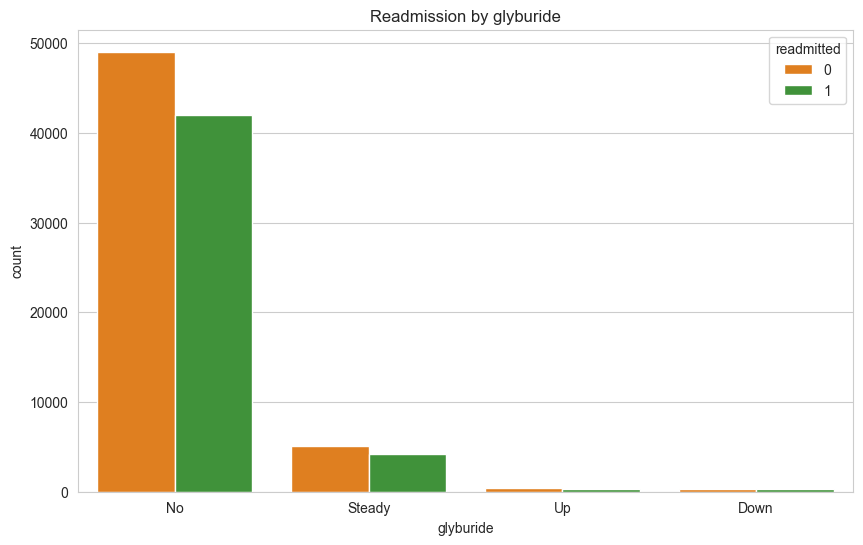

In [70]:
#plot the distribution of glyburide
plt.figure(figsize=(10, 6))
sns.countplot(x='glyburide', hue='glyburide', data=df, palette='muted',legend=False)
plt.title('Distribution of glyburide')

# plot to see the relation between glyburide and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='glyburide', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by glyburide')

[0.4615215768909961, 0.4546042700021566, 0.4421182266009852, 0.4875886524822695]


Text(0.5, 1.0, 'Readmission percentage by glyburide')

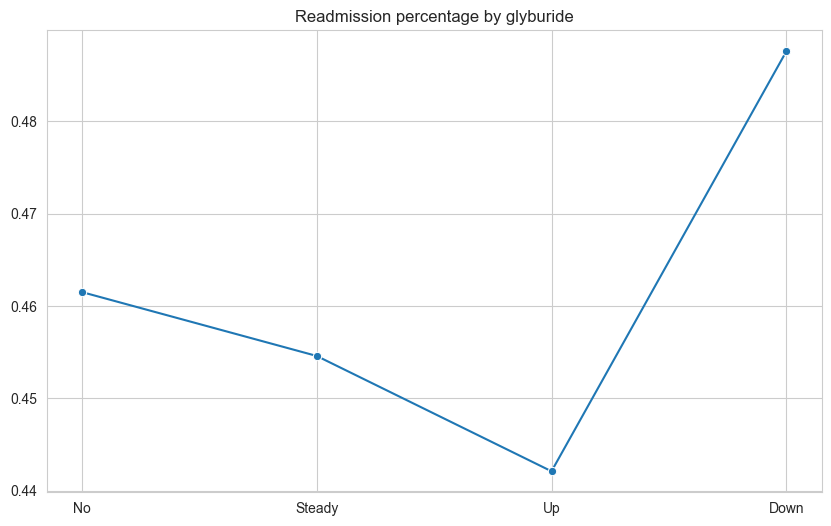

In [71]:
# readmission percentage by glyburide
print(readmission_percentage('glyburide'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['glyburide'].unique(),y=readmission_percentage('glyburide'),marker='o')
plt.title('Readmission percentage by glyburide')

The prescription for glipizide results readmission rate decrease when keeping the dosage steady and significantly decrease when increase the dosage then reach the top decrease the dosage. 

## tolbutamide

Text(0.5, 1.0, 'Readmission by tolbutamide')

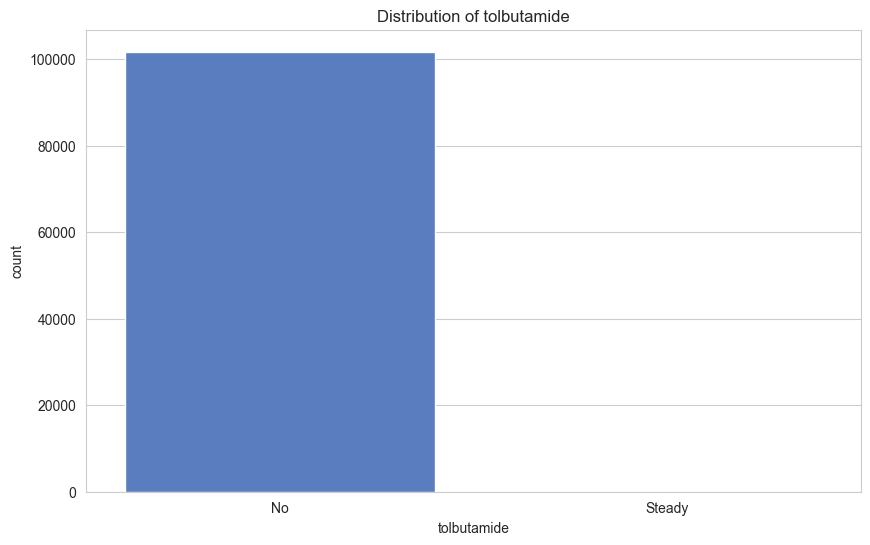

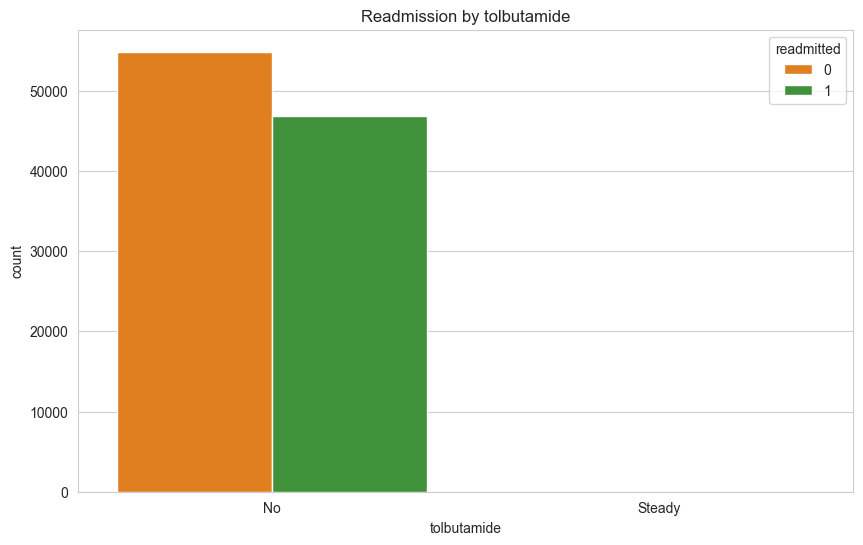

In [72]:
#plot the distribution of tolbutamide
plt.figure(figsize=(10, 6))
sns.countplot(x='tolbutamide', hue='tolbutamide', data=df, palette='muted',legend=False)
plt.title('Distribution of tolbutamide')

# plot to see the relation between tolbutamide and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='tolbutamide', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by tolbutamide')

[0.4609064014231937, 0.34782608695652173]


Text(0.5, 1.0, 'Readmission percentage by tolbutamide')

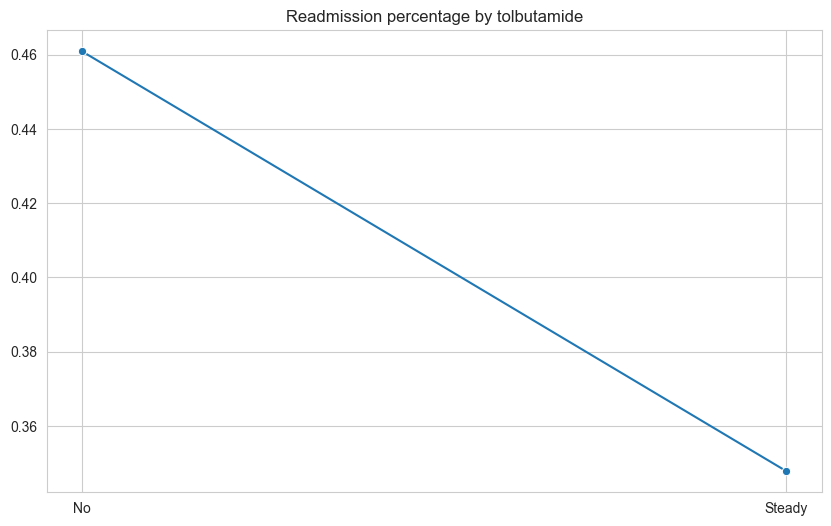

In [73]:
# readmission percentage by tolbutamide
print(readmission_percentage('tolbutamide'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['tolbutamide'].unique(),y=readmission_percentage('tolbutamide'),marker='o')
plt.title('Readmission percentage by tolbutamide')

The prescription for tolbutamide result the admission rate go down when keeping the dosage steady

## pioglitazone

Text(0.5, 1.0, 'Readmission by pioglitazone')

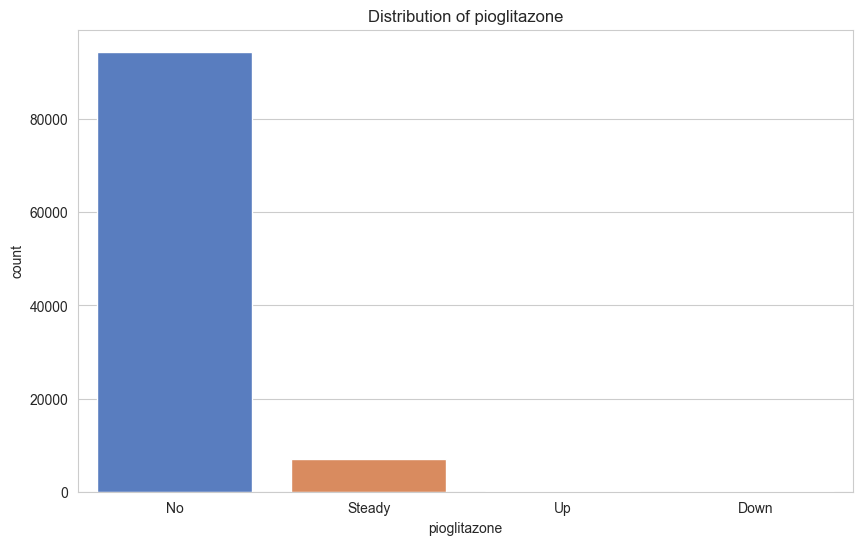

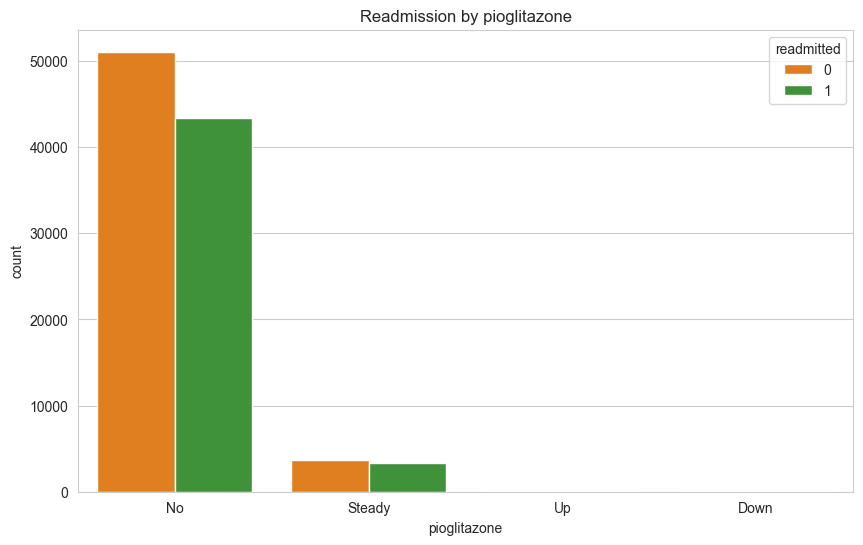

In [74]:
#plot the distribution of pioglitazone
plt.figure(figsize=(10, 6))
sns.countplot(x='pioglitazone', hue='pioglitazone', data=df, palette='muted',legend=False)
plt.title('Distribution of pioglitazone')

# plot to see the relation between pioglitazone and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='pioglitazone', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by pioglitazone')

[0.4592536902518054, 0.4797878440366973, 0.5170940170940171, 0.5338983050847458]


Text(0.5, 1.0, 'Readmission percentage by pioglitazone')

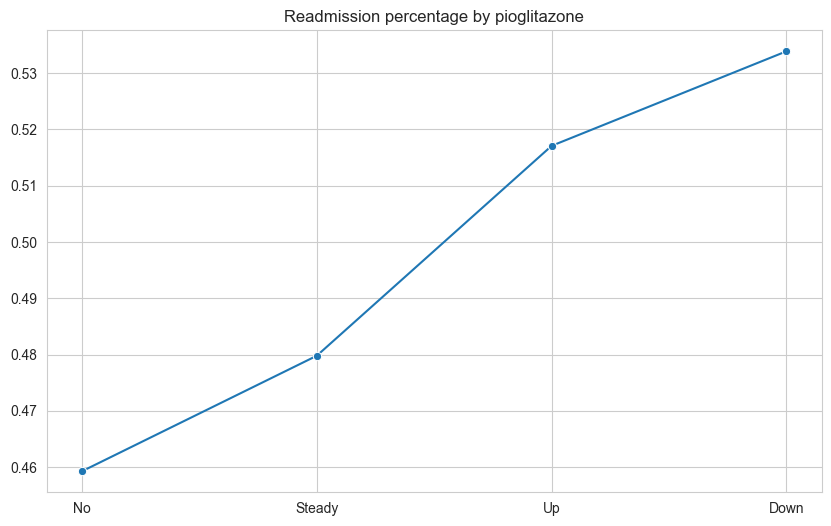

In [75]:
# readmission percentage by pioglitazone
print(readmission_percentage('pioglitazone'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['pioglitazone'].unique(),y=readmission_percentage('pioglitazone'),marker='o')
plt.title('Readmission percentage by pioglitazone')

The prescription for pioglitazone results the admission rate go up when keeping the dosage steady the get higher when increase the dosage then reach the top when decrease the dosage.

## rosiglitazone

Text(0.5, 1.0, 'Readmission by rosiglitazone')

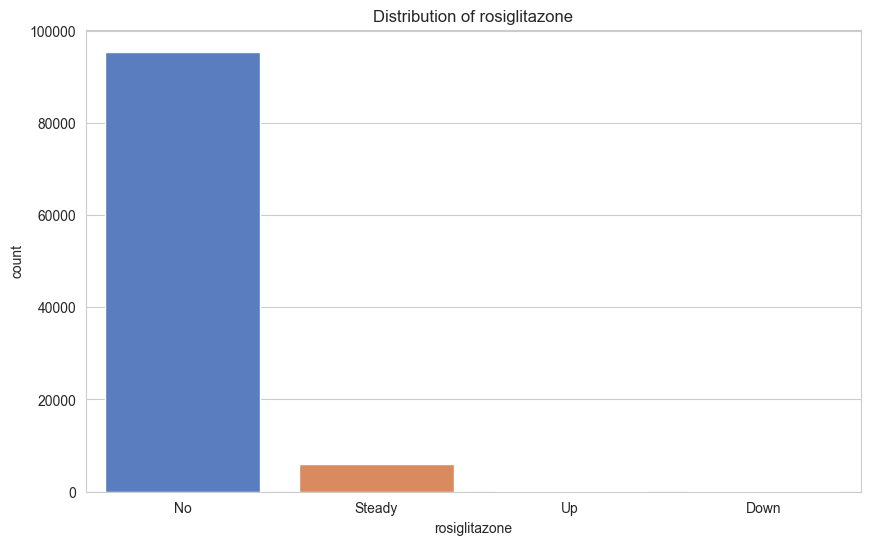

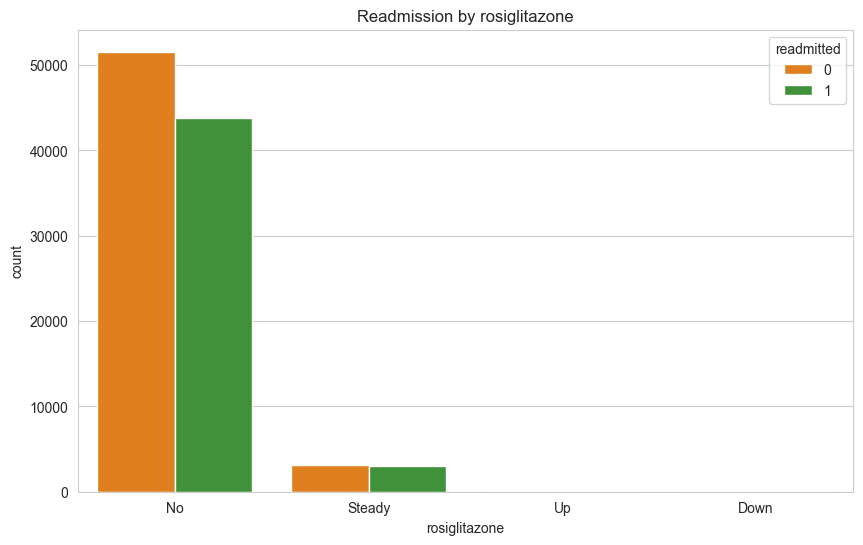

In [76]:
#plot the distribution of rosiglitazone
plt.figure(figsize=(10, 6))
sns.countplot(x='rosiglitazone', hue='rosiglitazone', data=df, palette='muted',legend=False)
plt.title('Distribution of rosiglitazone')

# plot to see the relation between rosiglitazone and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='rosiglitazone', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by rosiglitazone')

[0.45940818230416874, 0.4878688524590164, 0.398876404494382, 0.3103448275862069]


Text(0.5, 1.0, 'Readmission percentage by rosiglitazone')

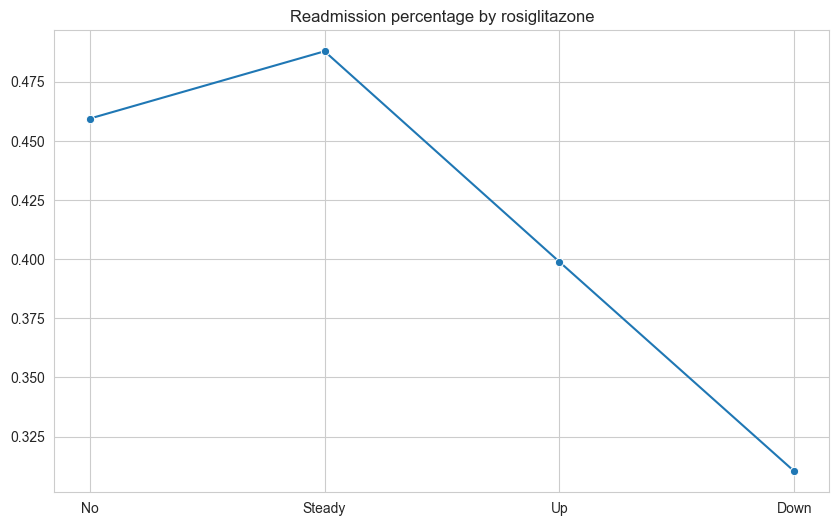

In [77]:
# readmission percentage by rosiglitazone
print(readmission_percentage('rosiglitazone'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['rosiglitazone'].unique(),y=readmission_percentage('rosiglitazone'),marker='o')
plt.title('Readmission percentage by rosiglitazone')

The prescription for rosiglitazone results the admission rate go down when keeping the dosage steady the get higher when increase the dosage then reach the top when decrease the dosage.

## acarbose

Text(0.5, 1.0, 'Readmission by acarbose')

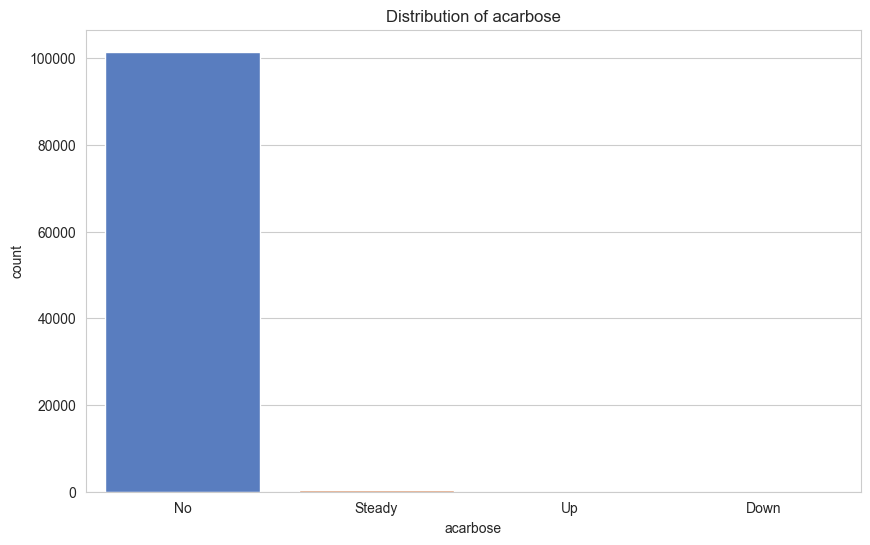

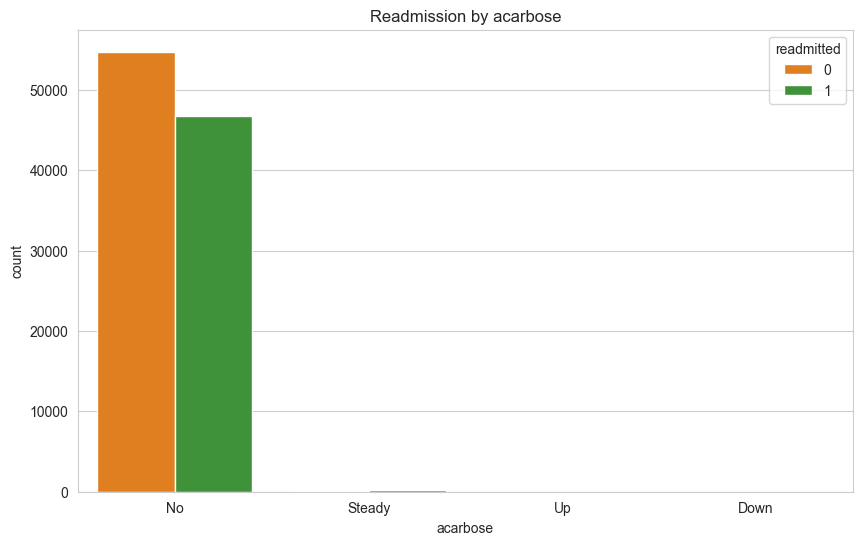

In [78]:
#plot the distribution of acarbose
plt.figure(figsize=(10, 6))
sns.countplot(x='acarbose', hue='acarbose', data=df, palette='muted',legend=False)
plt.title('Distribution of acarbose')

# plot to see the relation between acarbose and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='acarbose', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by acarbose')

[0.46047625618482524, 0.5932203389830508, 0.6, 0.6666666666666666]


Text(0.5, 1.0, 'Readmission percentage by acarbose')

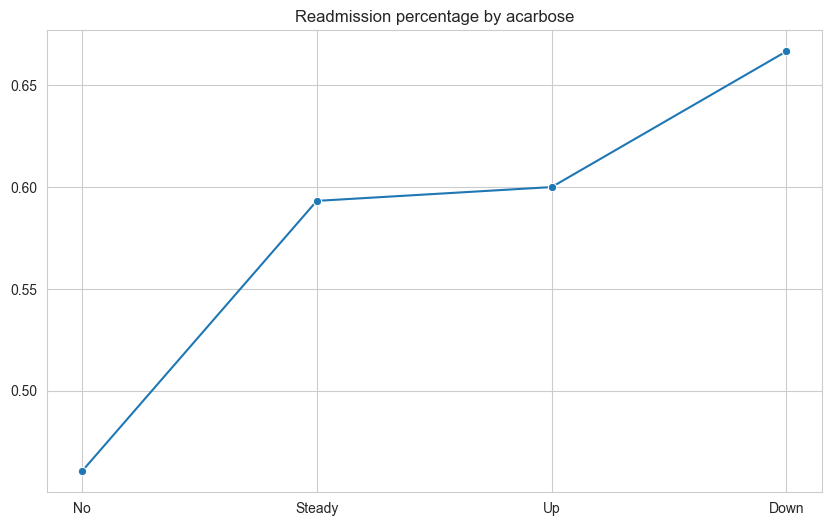

In [79]:
# readmission percentage by acarbose
print(readmission_percentage('acarbose'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['acarbose'].unique(),y=readmission_percentage('acarbose'),marker='o')
plt.title('Readmission percentage by acarbose')

The prescription for carbose results the admission rate go up when keeping the dosage steady. It barely increase when increase the dosage then reach the top when decrease the dosage.

## miglitol

Text(0.5, 1.0, 'Readmission by miglitol')

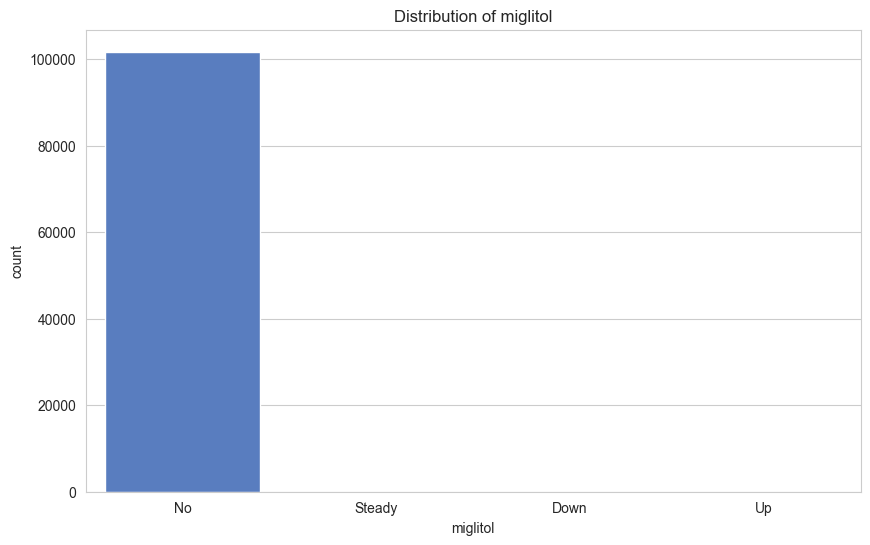

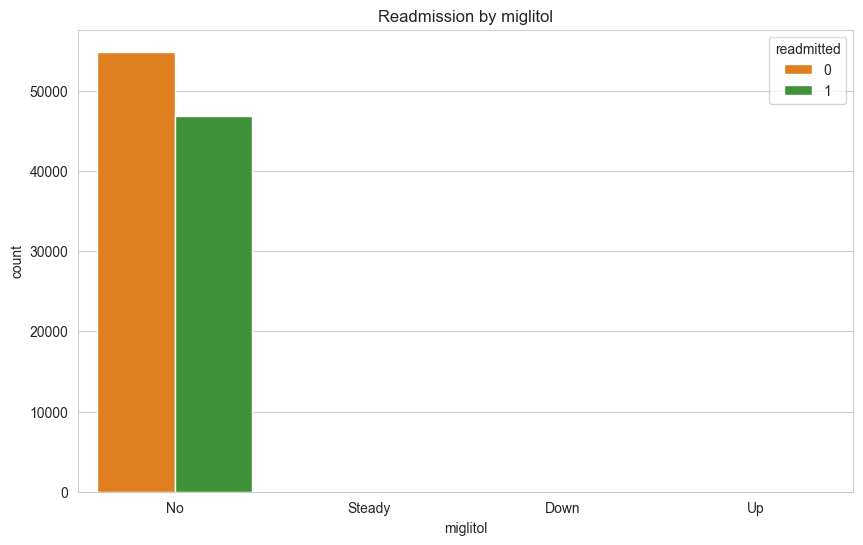

In [80]:
#plot the distribution of miglitol
plt.figure(figsize=(10, 6))
sns.countplot(x='miglitol', hue='miglitol', data=df, palette='muted',legend=False)
plt.title('Distribution of miglitol')

# plot to see the relation between miglitol and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='miglitol', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by miglitol')

[0.4608170808430324, 0.5806451612903226, 1.0, 0.5]


Text(0.5, 1.0, 'Readmission percentage by miglitol')

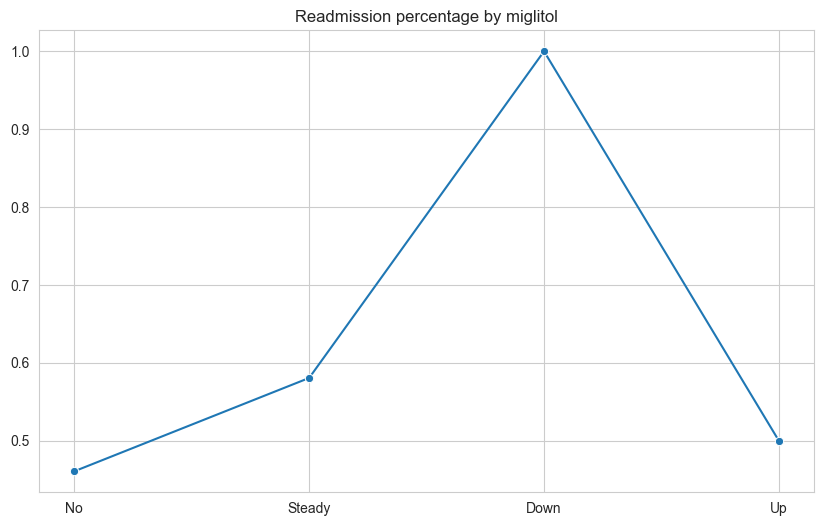

In [81]:
# readmission percentage by miglitol
print(readmission_percentage('miglitol'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['miglitol'].unique(),y=readmission_percentage('miglitol'),marker='o')
plt.title('Readmission percentage by miglitol')

The prescription for miglitol results the admission rate go up when keeping the dosage steady. It significantly go up when decrease the dosage then reach the top.  when the dosage increase the admission rate go down and nearly reach the bottom.

## troglitazone

Text(0.5, 1.0, 'Readmission by troglitazone')

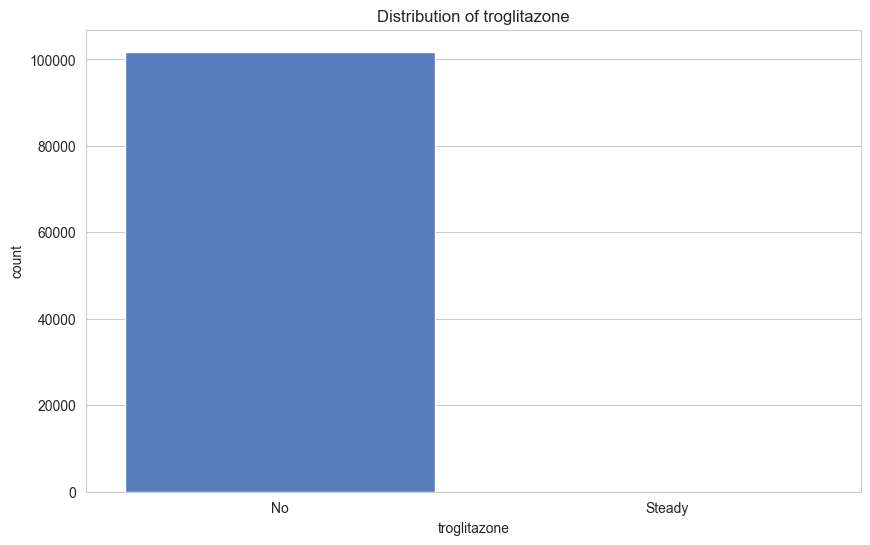

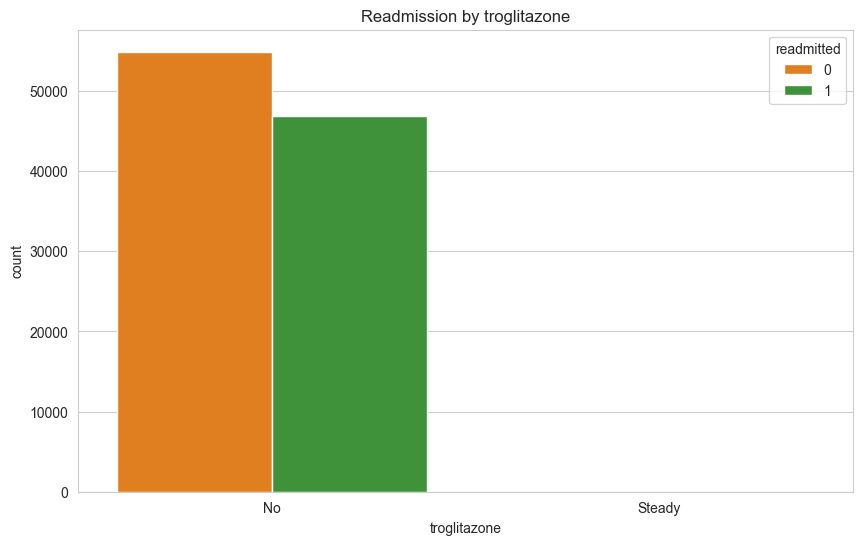

In [82]:
#plot the distribution of troglitazone
plt.figure(figsize=(10, 6))
sns.countplot(x='troglitazone', hue='troglitazone', data=df, palette='muted',legend=False)
plt.title('Distribution of troglitazone')

# plot to see the relation between troglitazone and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='troglitazone', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by troglitazone')

[0.4608747776696835, 0.6666666666666666]


Text(0.5, 1.0, 'Readmission percentage by troglitazone')

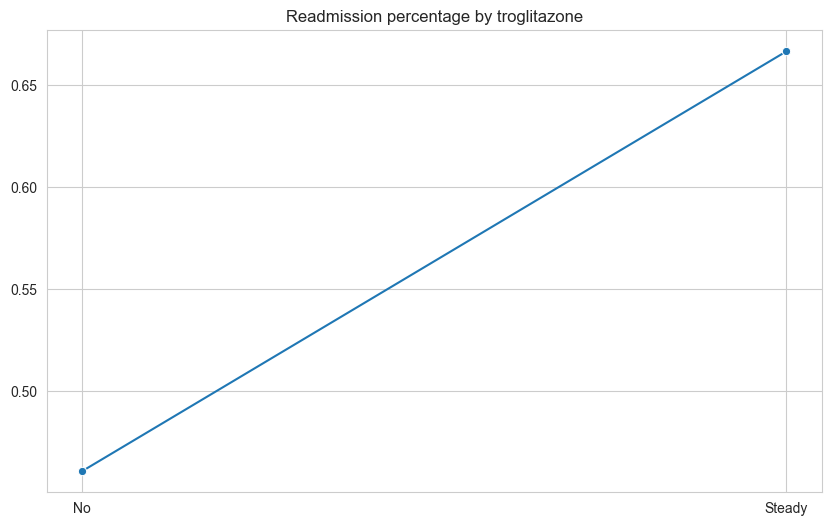

In [83]:
# readmission percentage by troglitazone
print(readmission_percentage('troglitazone'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['troglitazone'].unique(),y=readmission_percentage('troglitazone'),marker='o')
plt.title('Readmission percentage by troglitazone')

The prescription for troglitazone results the admission rate go up when keeping the dosage steady. 

## tolazamide

Text(0.5, 1.0, 'Readmission by tolazamide')

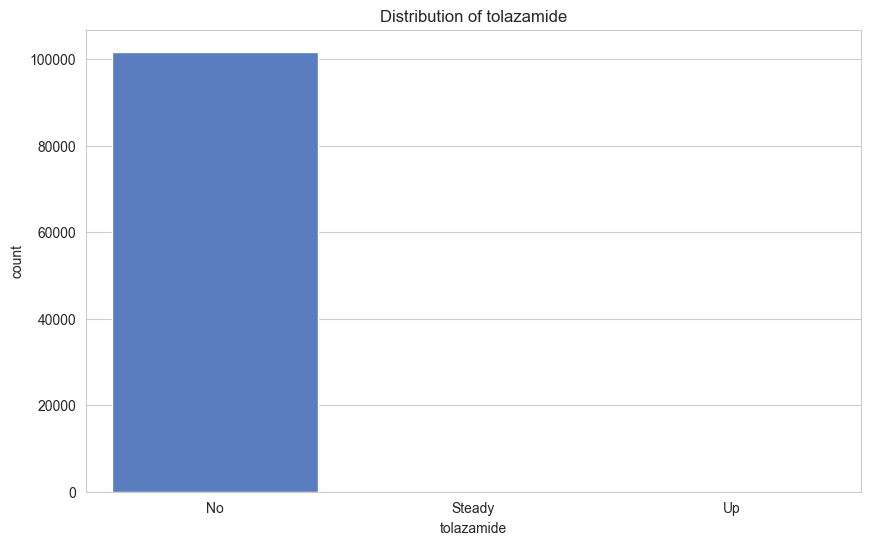

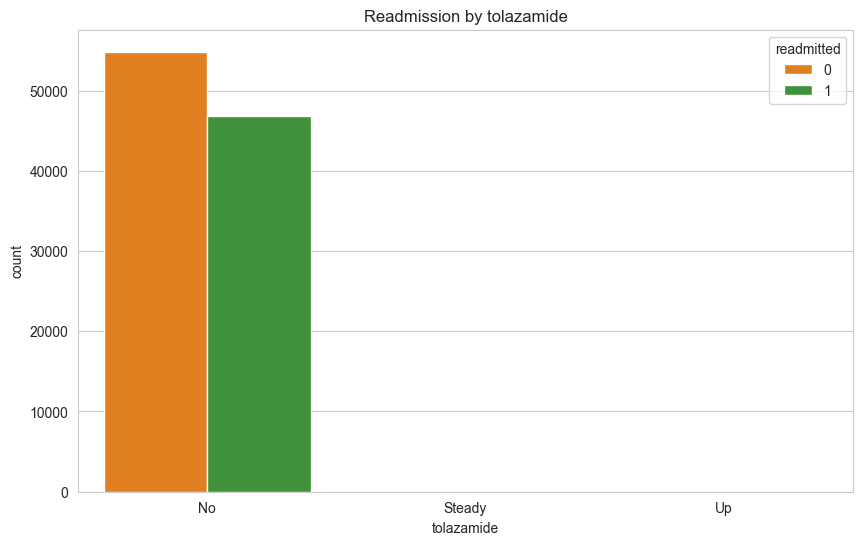

In [84]:
#plot the distribution of tolazamide
plt.figure(figsize=(10, 6))
sns.countplot(x='tolazamide', hue='tolazamide', data=df, palette='muted',legend=False)
plt.title('Distribution of tolazamide')

# plot to see the relation between tolazamide and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='tolazamide', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by tolazamide')

[0.4609297433326452, 0.3157894736842105, 1.0]


Text(0.5, 1.0, 'Readmission percentage by tolazamide')

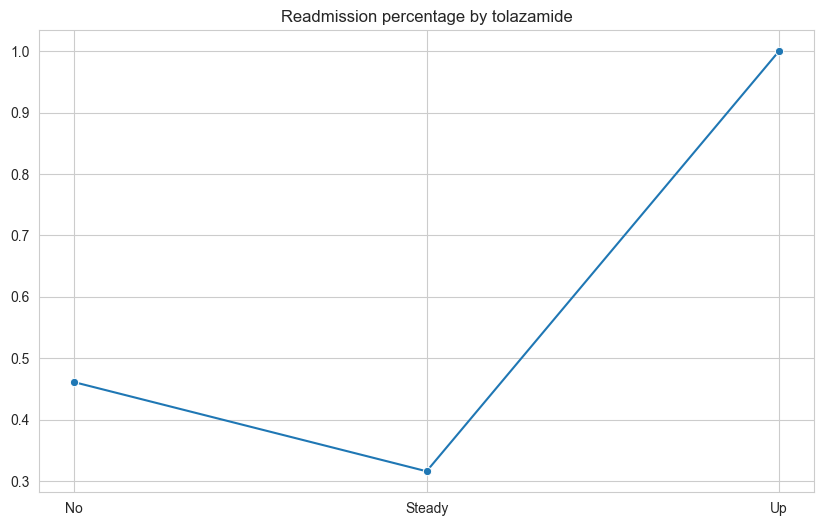

In [85]:
# readmission percentage by tolazamide
print(readmission_percentage('tolazamide'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['tolazamide'].unique(),y=readmission_percentage('tolazamide'),marker='o')
plt.title('Readmission percentage by tolazamide')

The prescription for tolazamide results the admission rate go down when keeping the dosage steady. It significantly go up when increase the dosage then reach the top.

## examide

Text(0.5, 1.0, 'Readmission by examide')

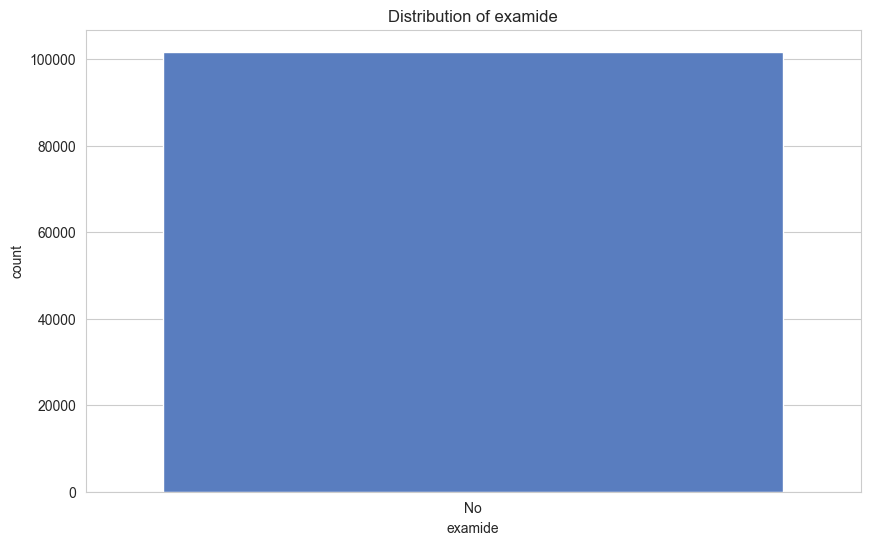

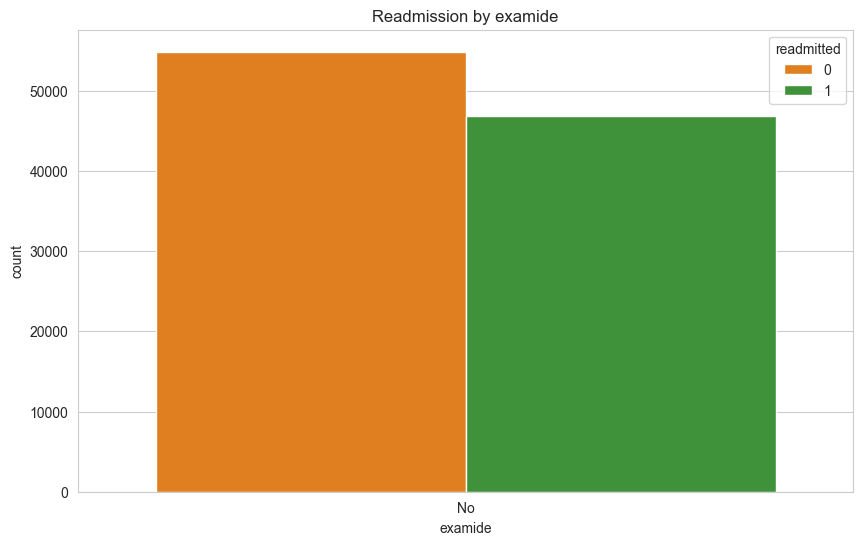

In [86]:
#plot the distribution of examide
plt.figure(figsize=(10, 6))
sns.countplot(x='examide', hue='examide', data=df, palette='muted',legend=False)
plt.title('Distribution of examide')

# plot to see the relation between examide and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='examide', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by examide')

[0.4608808442898414]


Text(0.5, 1.0, 'Readmission percentage by examide')

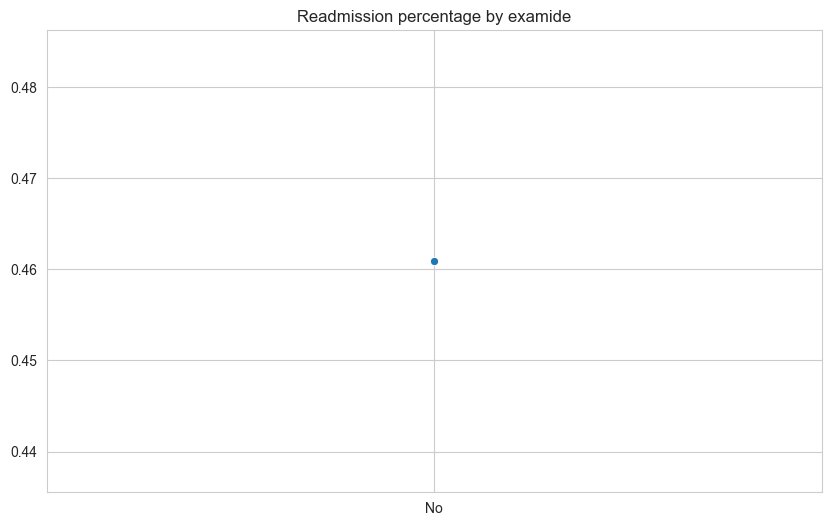

In [87]:
# readmission percentage by examide
print(readmission_percentage('examide'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['examide'].unique(),y=readmission_percentage('examide'),marker='o')
plt.title('Readmission percentage by examide')

We have no data for analyzing this attribute so we will drop this

In [88]:
df = df.drop(['examide'], axis=1)

## citoglipton

Text(0.5, 1.0, 'Readmission by citoglipton')

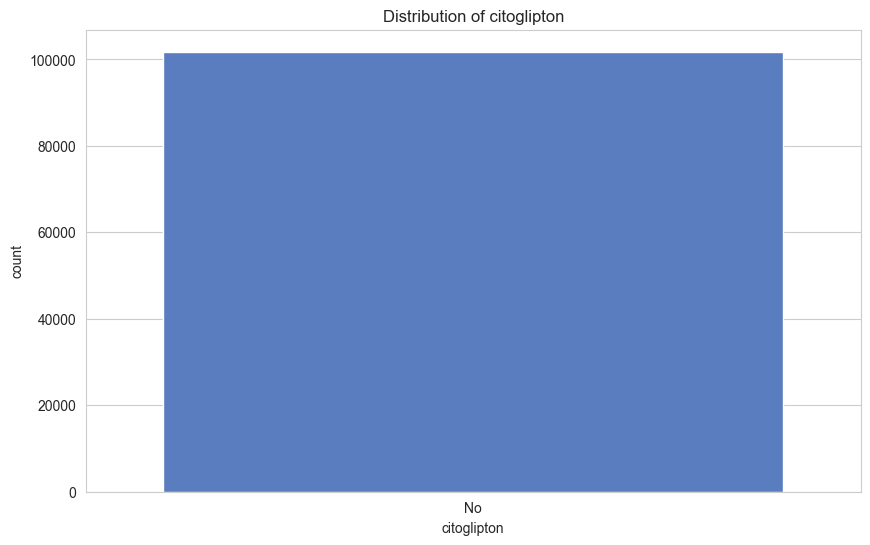

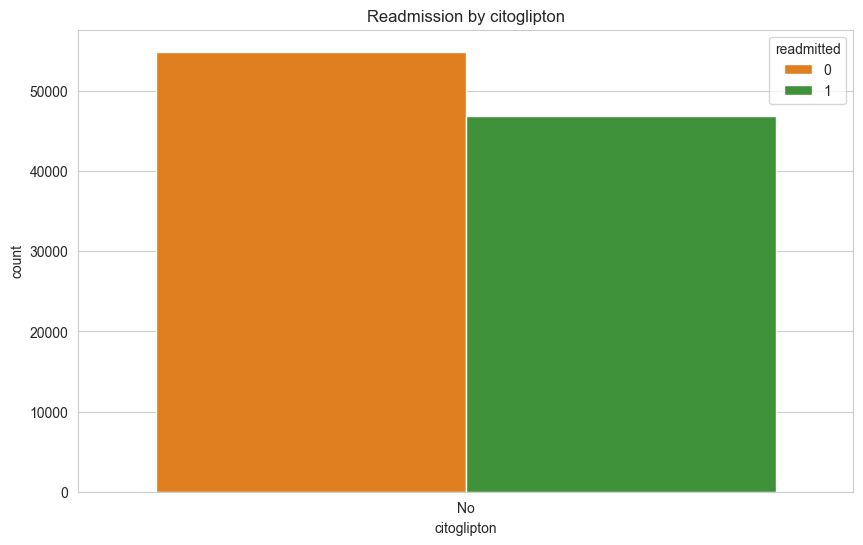

In [89]:
#plot the distribution of citoglipton
plt.figure(figsize=(10, 6))
sns.countplot(x='citoglipton', hue='citoglipton', data=df, palette='muted',legend=False)
plt.title('Distribution of citoglipton')

# plot to see the relation between citoglipton and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='citoglipton', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by citoglipton')

[0.4608808442898414]


Text(0.5, 1.0, 'Readmission percentage by citoglipton')

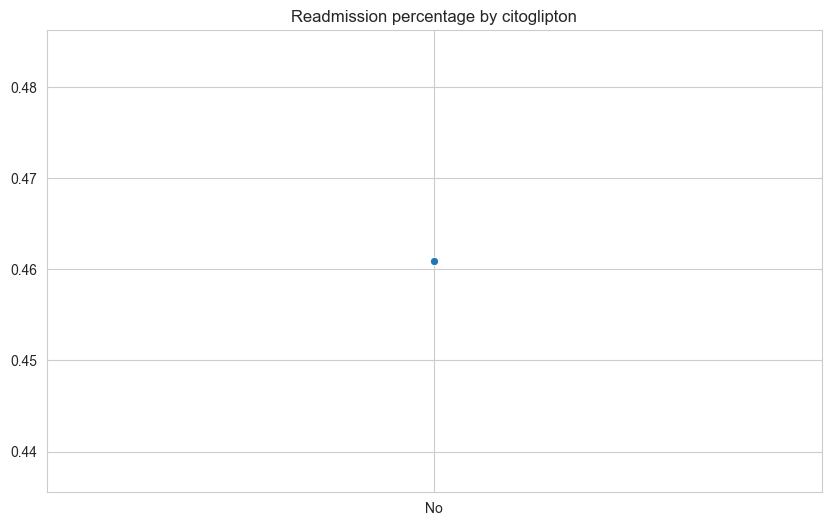

In [90]:
# readmission percentage by citoglipton
print(readmission_percentage('citoglipton'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['citoglipton'].unique(),y=readmission_percentage('citoglipton'),marker='o')
plt.title('Readmission percentage by citoglipton')

In [91]:
df = df.drop(['citoglipton'], axis=1)

## insulin

Text(0.5, 1.0, 'Readmission by insulin')

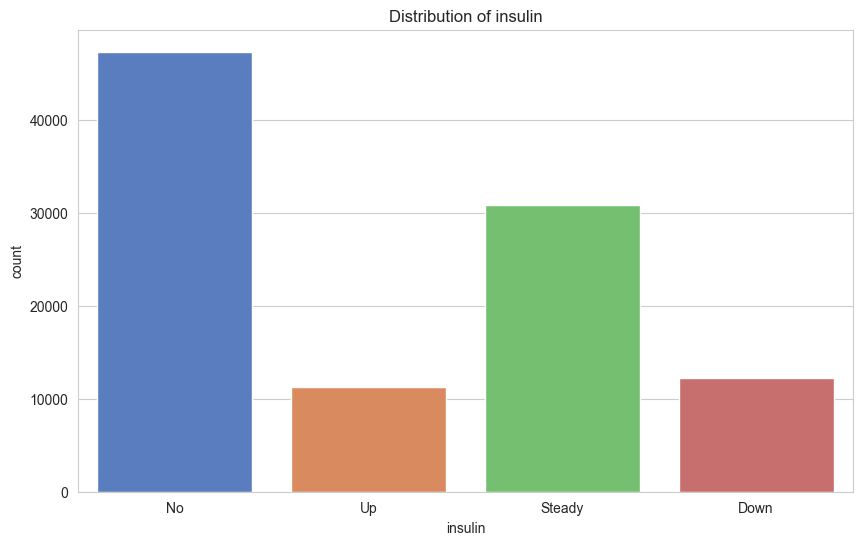

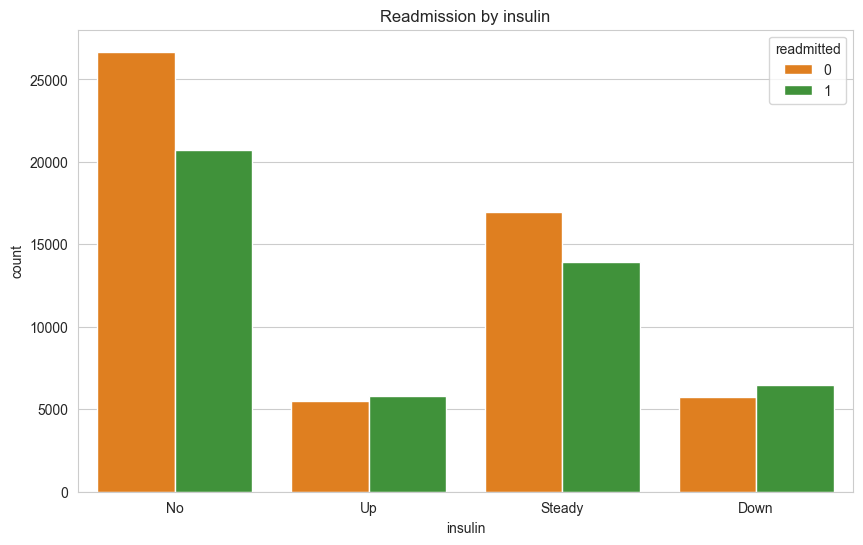

In [92]:
#plot the distribution of insulin
plt.figure(figsize=(10, 6))
sns.countplot(x='insulin', hue='insulin', data=df, palette='muted',legend=False)
plt.title('Distribution of insulin')

# plot to see the relation between insulin and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='insulin', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by insulin')

[0.43697106557204063, 0.5153764581124072, 0.45106810593536256, 0.5279096415125225]


Text(0.5, 1.0, 'Readmission percentage by insulin')

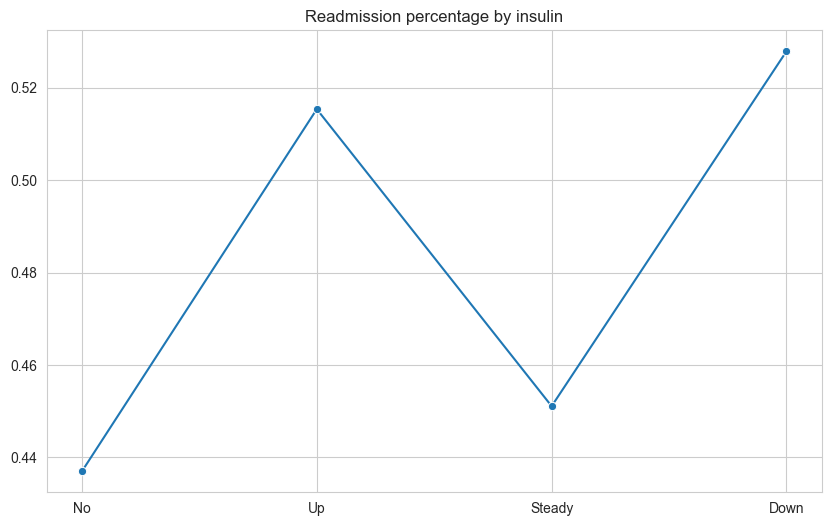

In [93]:
# readmission percentage by insulin
print(readmission_percentage('insulin'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['insulin'].unique(),y=readmission_percentage('insulin'),marker='o')
plt.title('Readmission percentage by insulin')

The prescription for insulin results the admission rate significantly go up when increase the dosage. The line go down when keeping the dosage steady and then reach the top when decrease the dosage.

## glyburide-metformin

Text(0.5, 1.0, 'Readmission by glyburide-metformin')

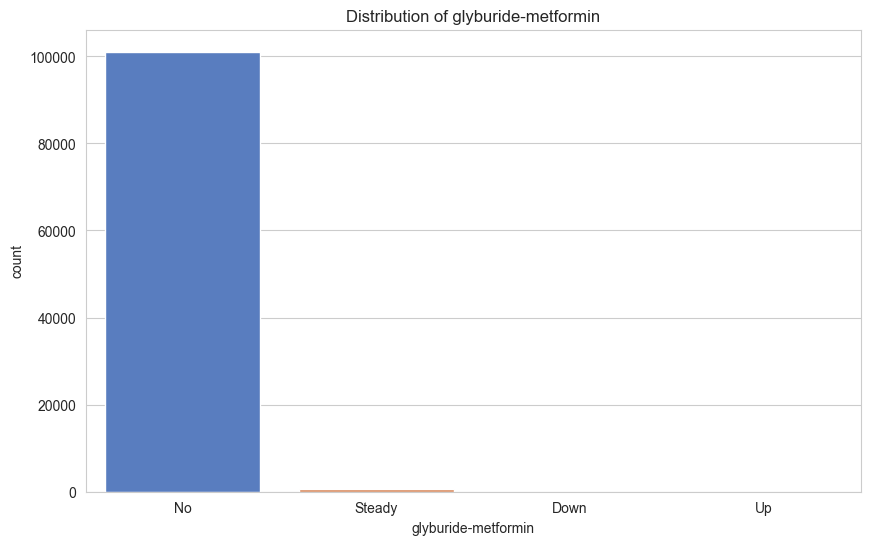

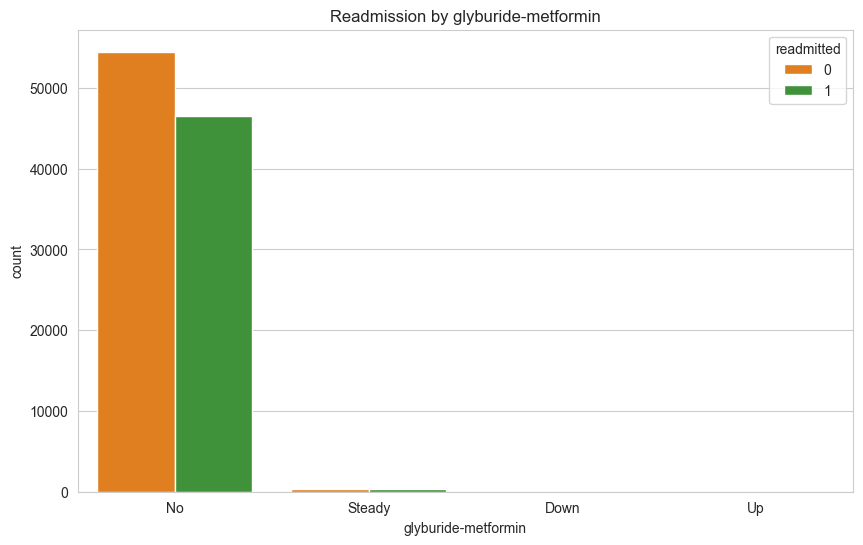

In [94]:
#plot the distribution of glyburide-metformin
plt.figure(figsize=(10, 6))
sns.countplot(x='glyburide-metformin', hue='glyburide-metformin', data=df, palette='muted',legend=False)
plt.title('Distribution of glyburide-metformin')

# plot to see the relation between glyburide-metformin and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='glyburide-metformin', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by glyburide-metformin')

[0.46077577676627746, 0.48265895953757226, 0.16666666666666666, 0.125]


Text(0.5, 1.0, 'Readmission percentage by glyburide-metformin')

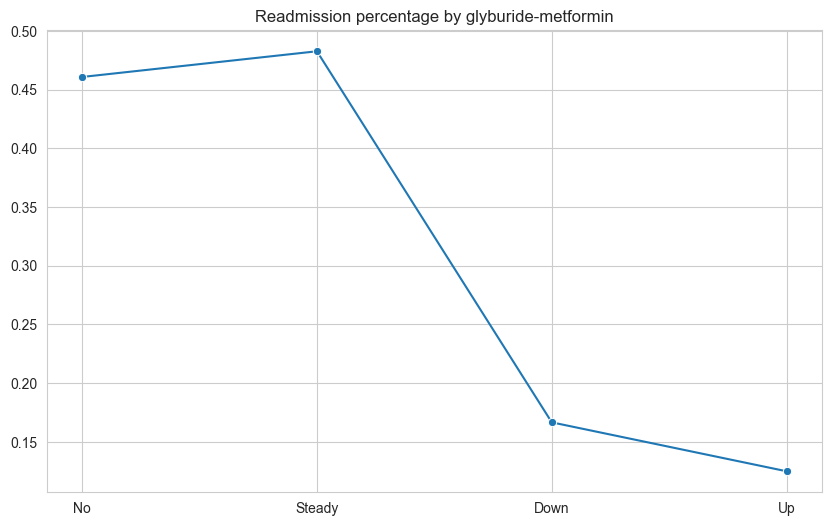

In [95]:
# readmission percentage by glyburide-metformin
print(readmission_percentage('glyburide-metformin'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['glyburide-metformin'].unique(),y=readmission_percentage('glyburide-metformin'),marker='o')
plt.title('Readmission percentage by glyburide-metformin')

The prescription for glyburide-metformin results the admission rate go up when keeping the dosage steady. It significantly go down when decrease the dosage then reach the bottom when increase the dosage.

## glipizide-metformin

Text(0.5, 1.0, 'Readmission by glipizide-metformin')

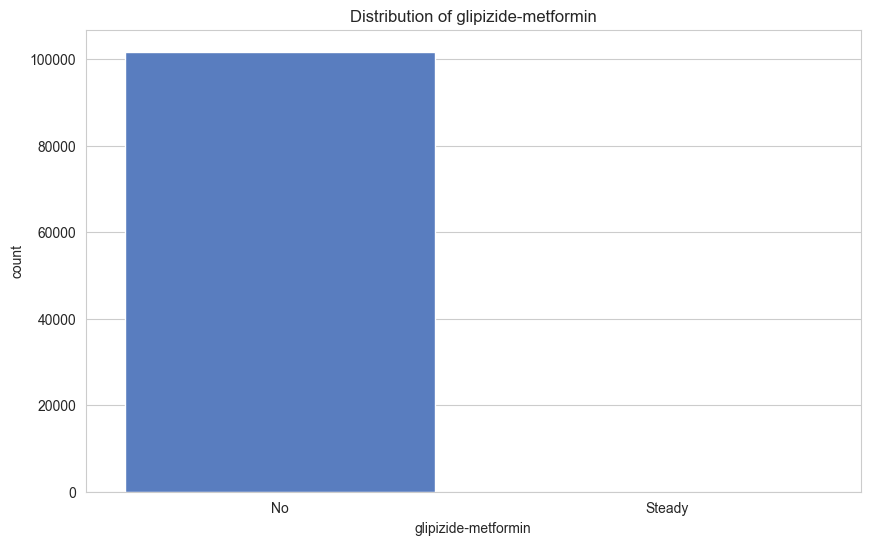

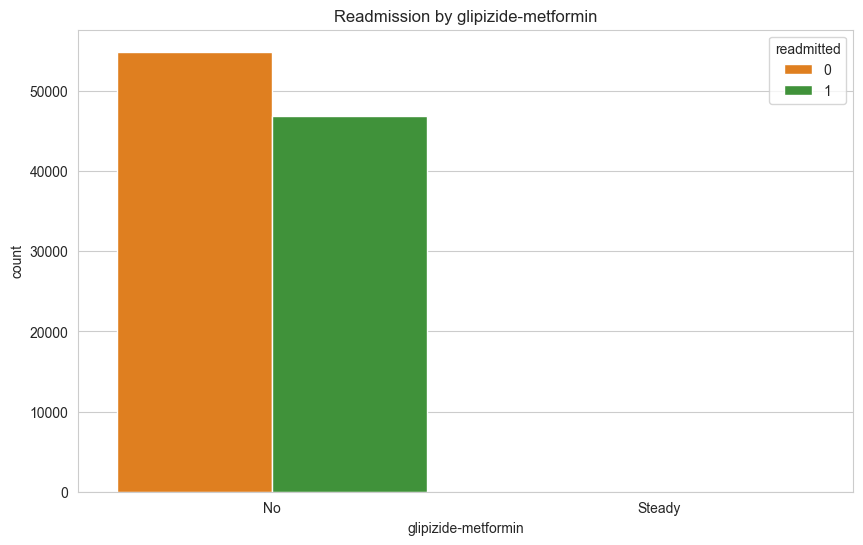

In [96]:
#plot the distribution of glipizide-metformin
plt.figure(figsize=(10, 6))
sns.countplot(x='glipizide-metformin', hue='glipizide-metformin', data=df, palette='muted',legend=False)
plt.title('Distribution of glipizide-metformin')

# plot to see the relation between glipizide-metformin and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='glipizide-metformin', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by glipizide-metformin')

[0.46086110483229, 0.6153846153846154]


Text(0.5, 1.0, 'Readmission percentage by glipizide-metformin')

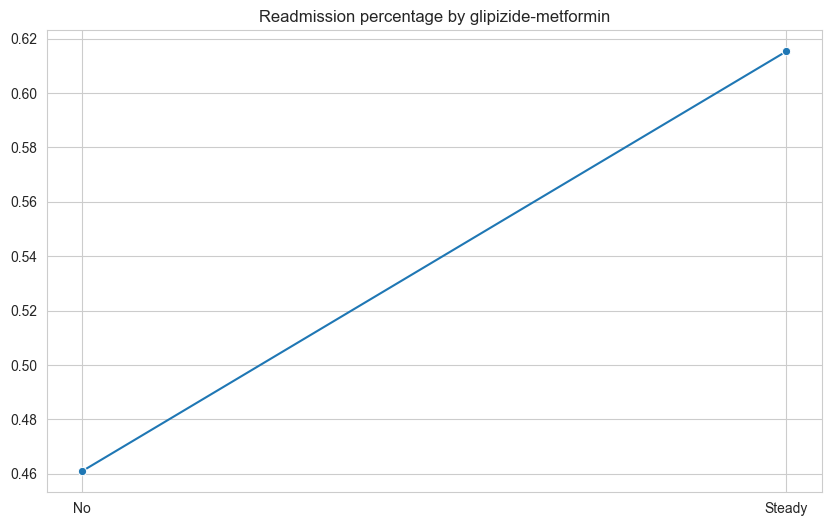

In [97]:
# readmission percentage by glipizide-metformin
print(readmission_percentage('glipizide-metformin'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['glipizide-metformin'].unique(),y=readmission_percentage('glipizide-metformin'),marker='o')
plt.title('Readmission percentage by glipizide-metformin')

The prescription for glipizide-metformin results the admission rate go up when keeping the dosage steady.

## glimepiride-pioglitazone

Text(0.5, 1.0, 'Readmission by glimepiride-pioglitazone')

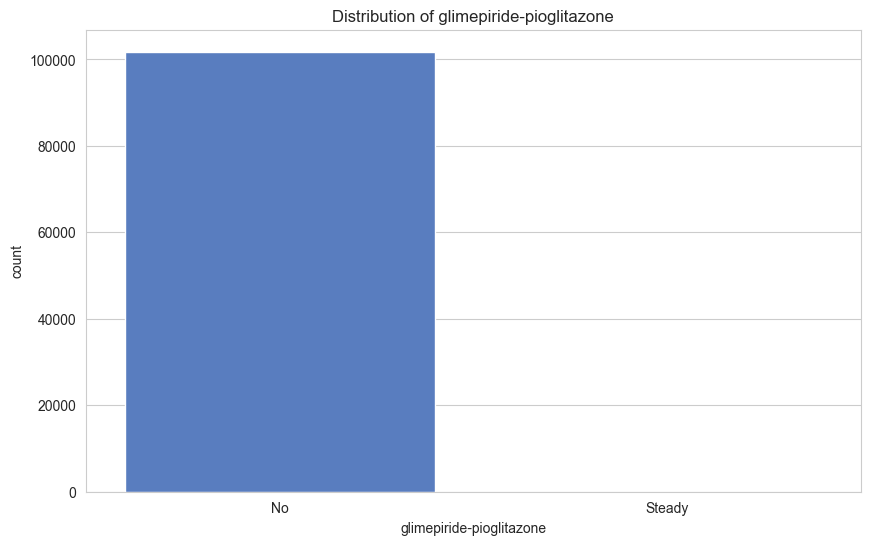

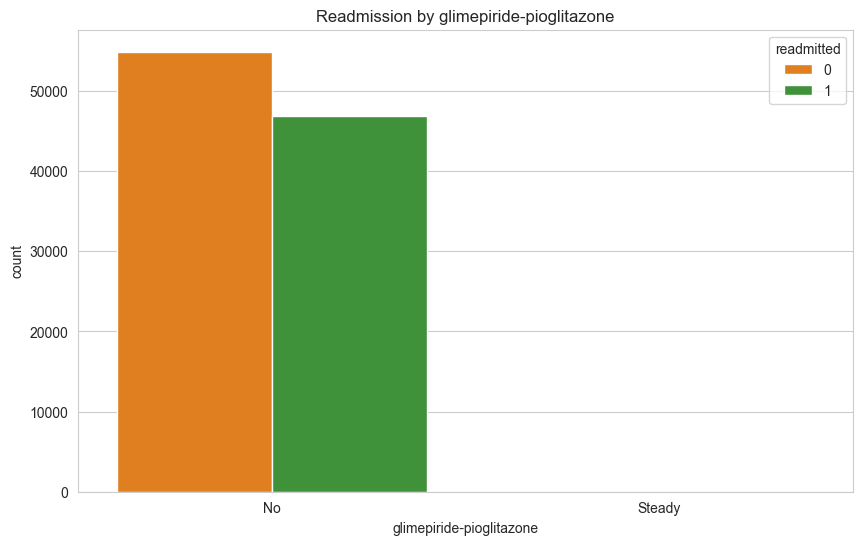

In [98]:
#plot the distribution of glimepiride-pioglitazone
plt.figure(figsize=(10, 6))
sns.countplot(x='glimepiride-pioglitazone', hue='glimepiride-pioglitazone', data=df, palette='muted',legend=False)
plt.title('Distribution of glimepiride-pioglitazone')

# plot to see the relation between glimepiride-pioglitazone and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='glimepiride-pioglitazone', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by glimepiride-pioglitazone')

[0.4608755466024665, 1.0]


Text(0.5, 1.0, 'Readmission percentage by glimepiride-pioglitazone')

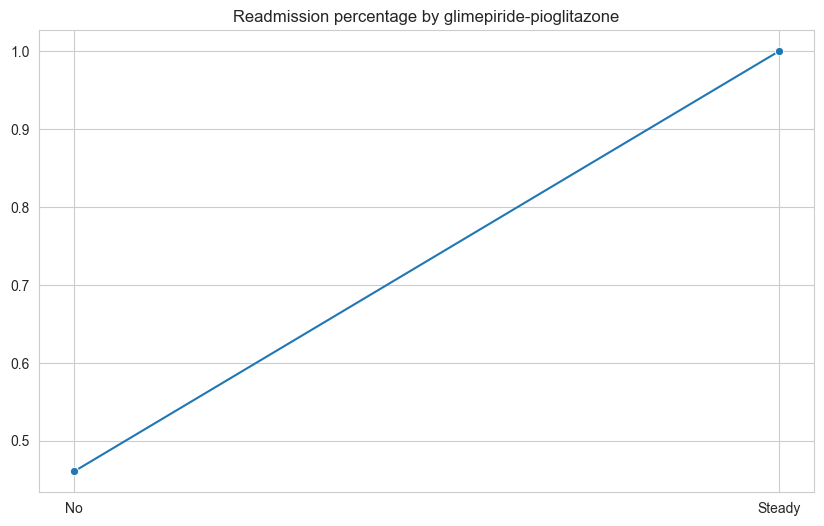

In [99]:
# readmission percentage by glimepiride-pioglitazone
print(readmission_percentage('glimepiride-pioglitazone'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['glimepiride-pioglitazone'].unique(),y=readmission_percentage('glimepiride-pioglitazone'),marker='o')
plt.title('Readmission percentage by glimepiride-pioglitazone')

The prescription for glimepiride-pioglitazone results the admission rate go up when keeping the dosage steady.

## metformin-rosiglitazone

Text(0.5, 1.0, 'Readmission by metformin-rosiglitazone')

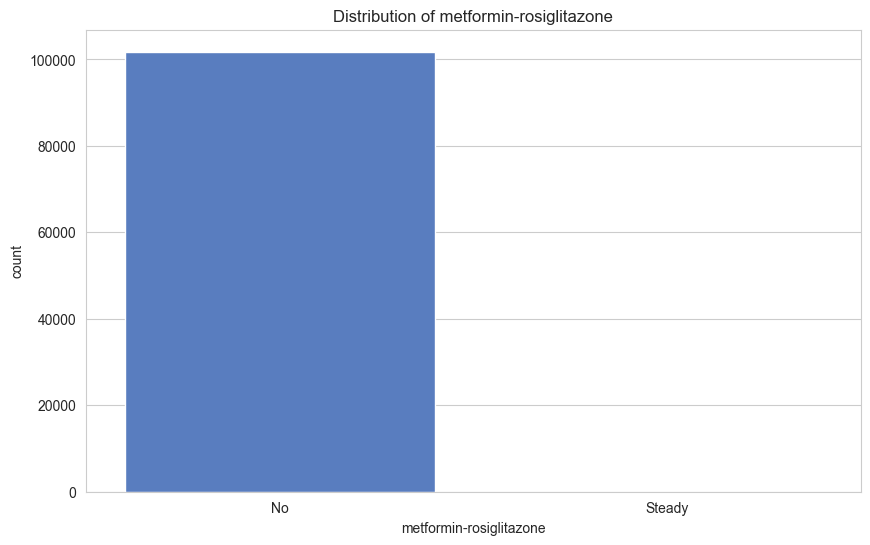

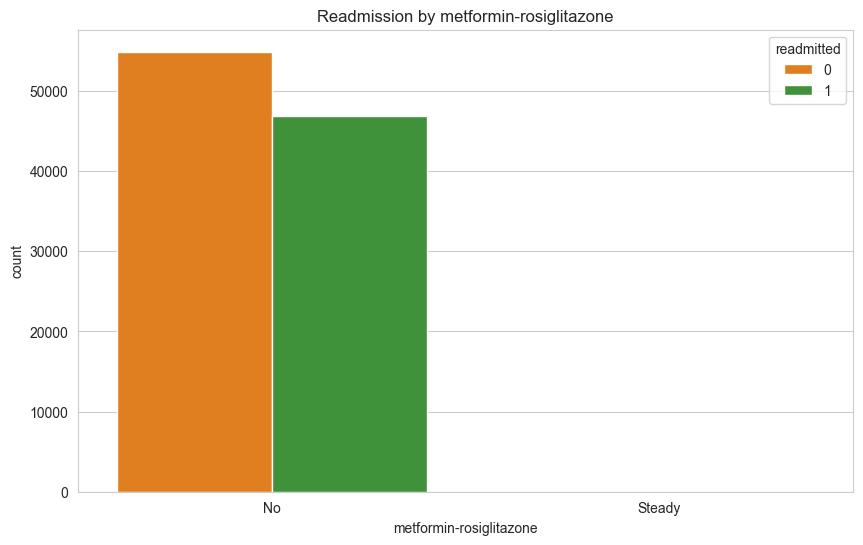

In [100]:
#plot the distribution of metformin-rosiglitazone
plt.figure(figsize=(10, 6))
sns.countplot(x='metformin-rosiglitazone', hue='metformin-rosiglitazone', data=df, palette='muted',legend=False)
plt.title('Distribution of metformin-rosiglitazone')

# plot to see the relation between metformin-rosiglitazone and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='metformin-rosiglitazone', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by metformin-rosiglitazone')

[0.4608899021264887, 0.0]


Text(0.5, 1.0, 'Readmission percentage by metformin-rosiglitazone')

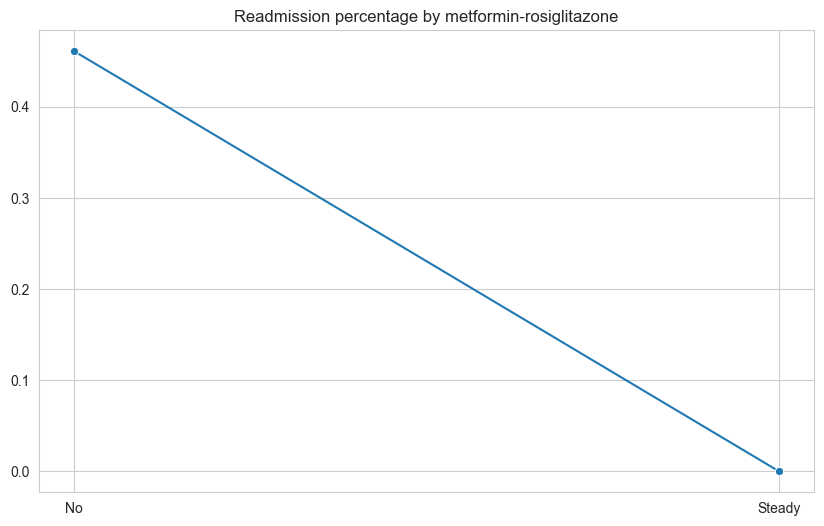

In [101]:
# readmission percentage by metformin-rosiglitazone
print(readmission_percentage('metformin-rosiglitazone'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['metformin-rosiglitazone'].unique(),y=readmission_percentage('metformin-rosiglitazone'),marker='o')
plt.title('Readmission percentage by metformin-rosiglitazone')

The prescription for metformin-rosiglitazone results the admission rate go down when keeping the dosage steady.

## metformin-pioglitazone

Text(0.5, 1.0, 'Readmission by metformin-pioglitazone')

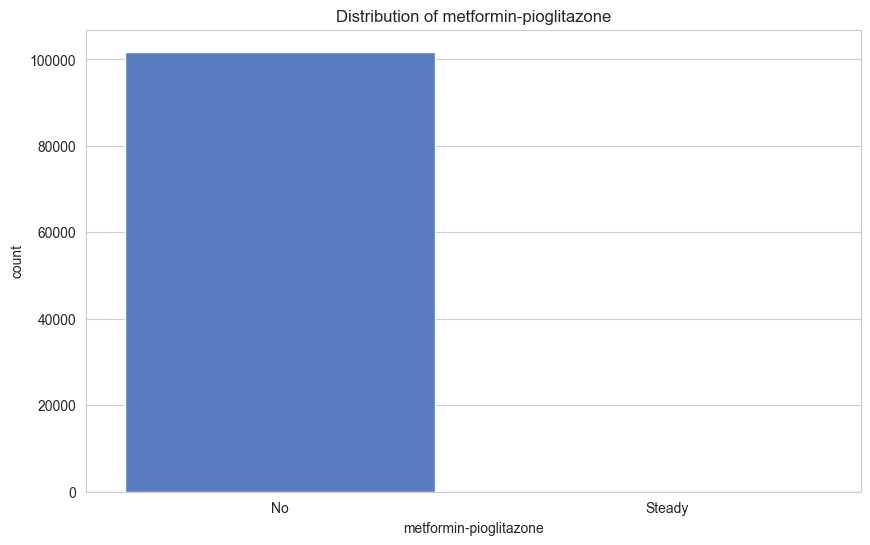

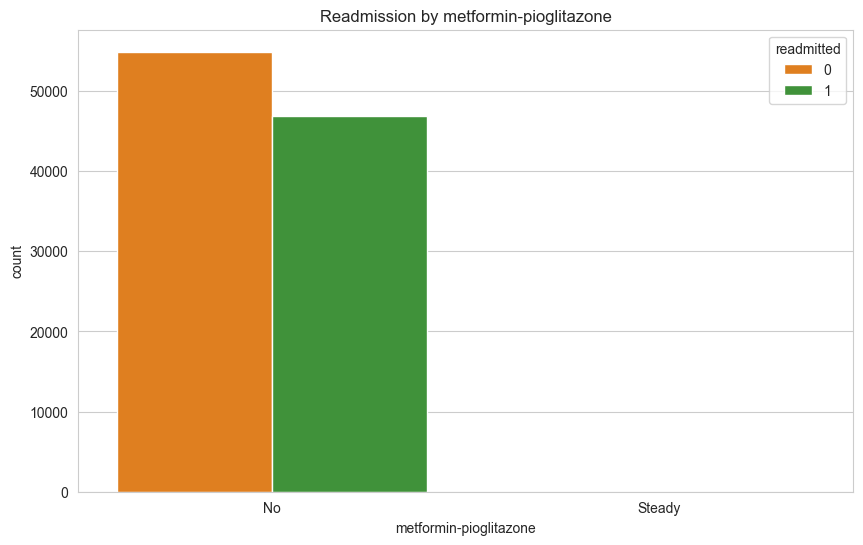

In [102]:
#plot the distribution of metformin-pioglitazone
plt.figure(figsize=(10, 6))
sns.countplot(x='metformin-pioglitazone', hue='metformin-pioglitazone', data=df, palette='muted',legend=False)
plt.title('Distribution of metformin-pioglitazone')

# plot to see the relation between metformin-pioglitazone and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='metformin-pioglitazone', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by metformin-pioglitazone')

[0.46088537316366135, 0.0]


Text(0.5, 1.0, 'Readmission percentage by metformin-pioglitazone')

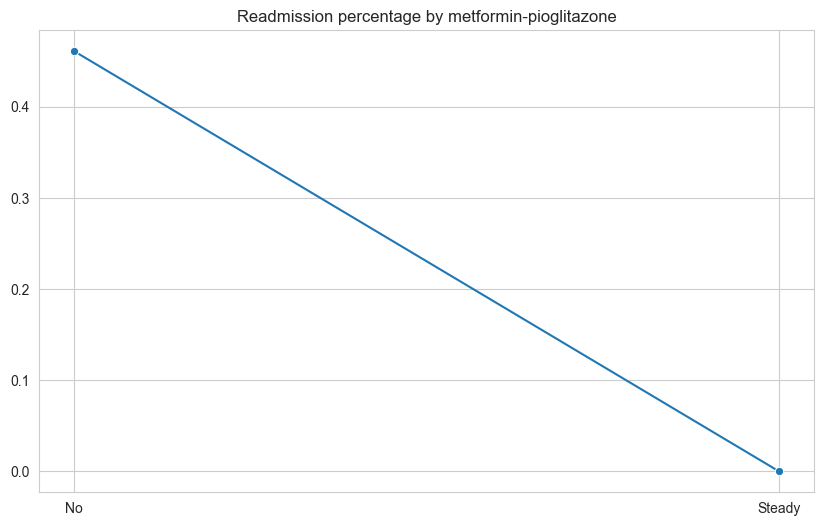

In [103]:
# readmission percentage by metformin-pioglitazone
print(readmission_percentage('metformin-pioglitazone'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['metformin-pioglitazone'].unique(),y=readmission_percentage('metformin-pioglitazone'),marker='o')
plt.title('Readmission percentage by metformin-pioglitazone')

The prescription for metformin-pioglitazone results the admission rate go down when keeping the dosage steady.

C:\Users\buiha\AppData\Local\Temp\ipykernel_21740\4285248673.py:6: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df['change'].replace(())


Text(0.5, 1.0, 'Readmission by change')

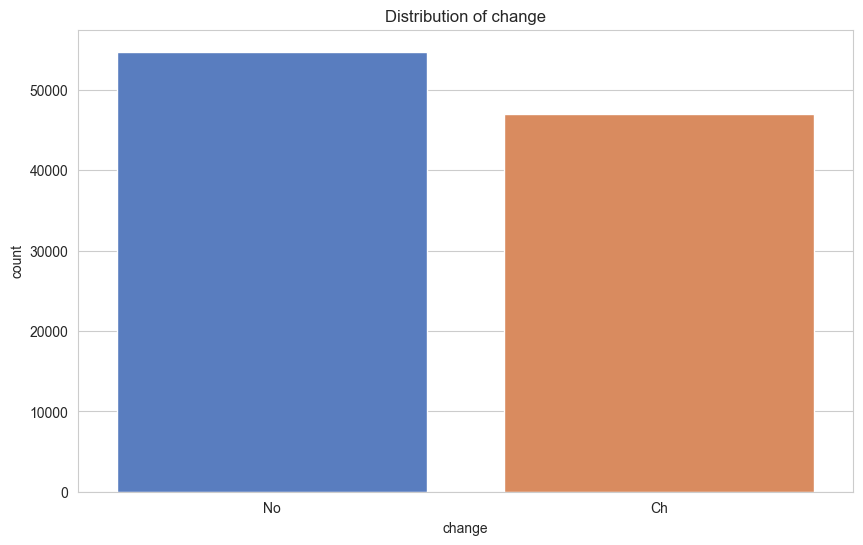

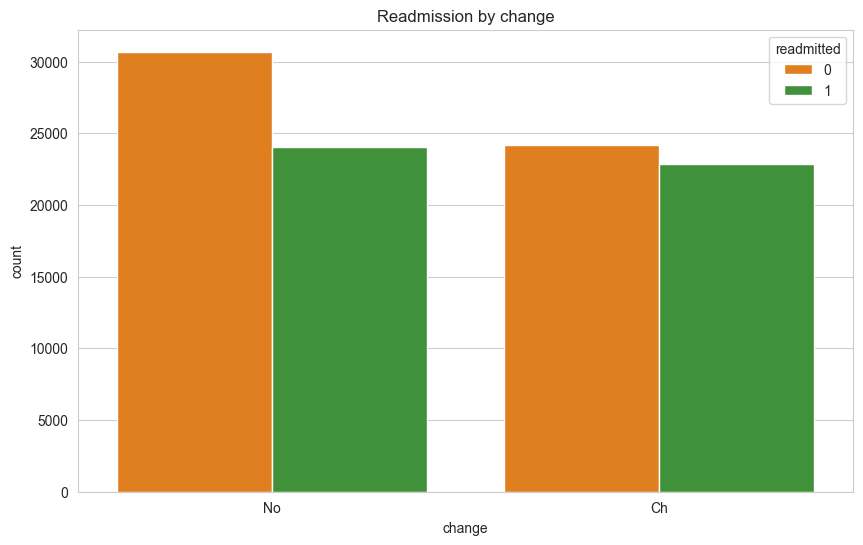

In [104]:
#plot the distribution of change
plt.figure(figsize=(10, 6))
sns.countplot(x='change', hue='change', data=df, palette='muted',legend=False)
plt.title('Distribution of change')

df['change'].replace(())

# plot to see the relation between change and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='change', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by change')

[0.4396310839192768, 0.4856310225266427]


Text(0.5, 1.0, 'Readmission percentage by change')

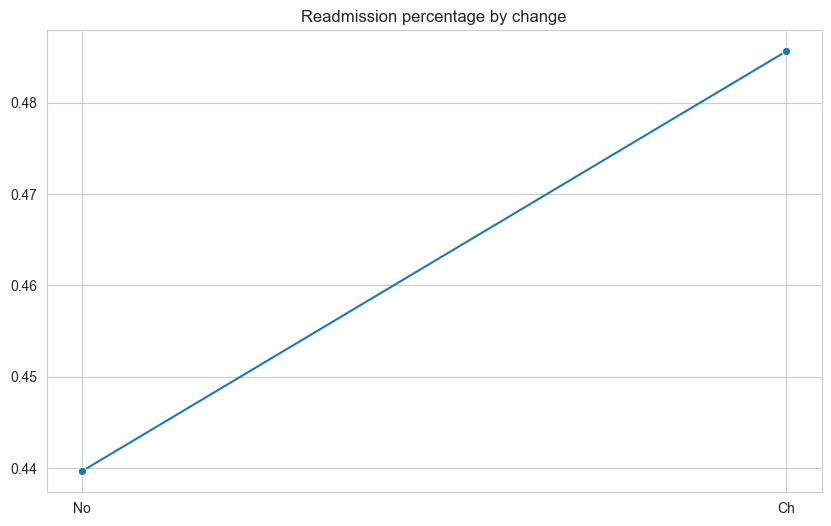

In [105]:
# readmission percentage by change
print(readmission_percentage('change'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['change'].unique(),y=readmission_percentage('change'),marker='o')
plt.title('Readmission percentage by change')

Based on the line we can see that the reatmission rate increase when the medication of the patient changed.  That means the patients have the higher percentages when their medication is changed.

Text(0.5, 1.0, 'Readmission by diabetesMed')

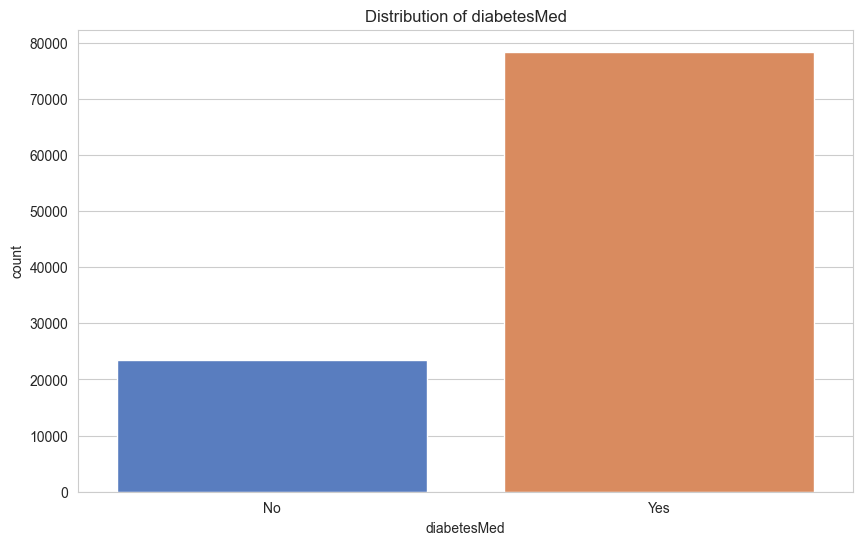

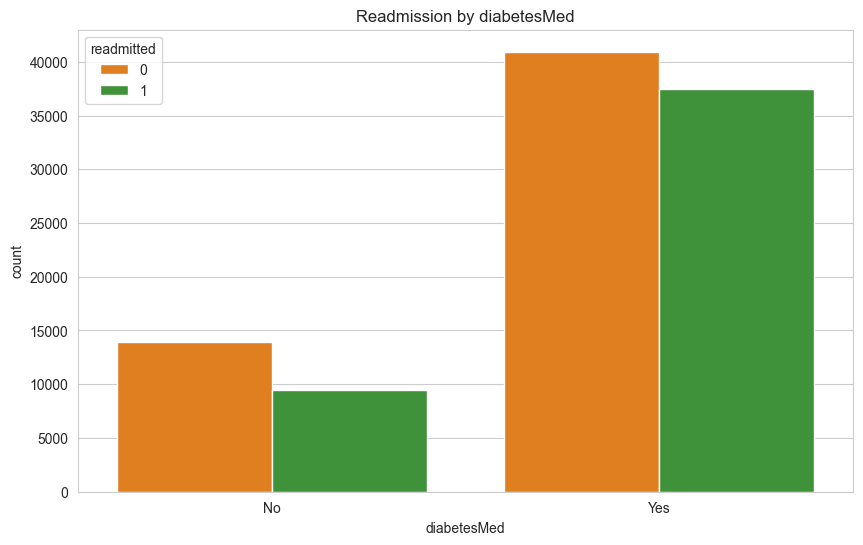

In [106]:
#plot the distribution of diabetesMed
plt.figure(figsize=(10, 6))
sns.countplot(x='diabetesMed', hue='diabetesMed', data=df, palette='muted',legend=False)
plt.title('Distribution of diabetesMed')

# plot to see the relation between diabetesMed and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='diabetesMed', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by diabetesMed')

[0.40477716532068536, 0.47763612929571353]


Text(0.5, 1.0, 'Readmission percentage by diabetesMed')

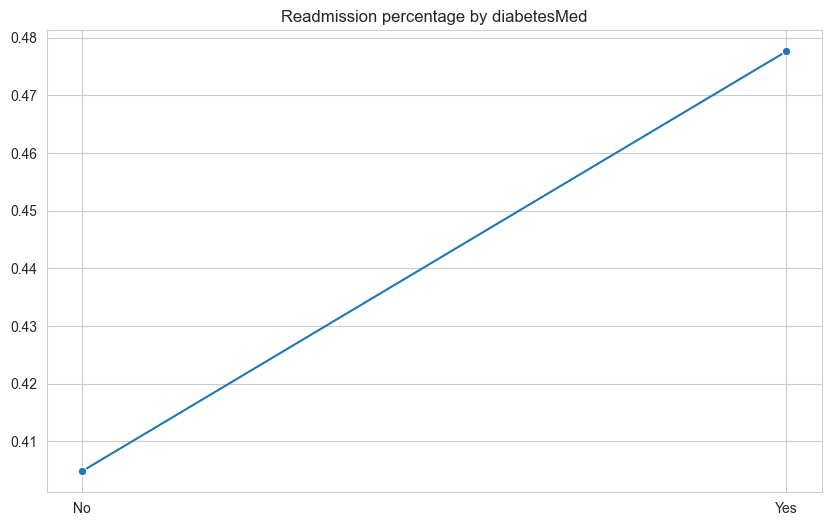

In [107]:
# readmission percentage by diabetesMed
print(readmission_percentage('diabetesMed'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['diabetesMed'].unique(),y=readmission_percentage('diabetesMed'),marker='o')
plt.title('Readmission percentage by diabetesMed')

Based on the line we can see that the reatmission rate increase when the patient have their diabetes medicaition